# Бизнес-постановка задачи
Основаная задача: предсказать дождь на следующий день

Дополнительно: предсказать дождь на текущий день, предсказать значения количества осадков

# Постановка ML-задачи
Основаная задача: предсказать дождь на следующий день - бинарная классификация

Дополнительно: предсказать дождь на текущий день - бинарная классификация, предсказать значения количества осадков - задача регрессии

# Выбор и обоснование метрик

Метрики для бинарной классификации:
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC

При обучении будем использовать все вышеперчисленные метрики. Также поставим задачу, что нам важно не пропускать дни с дождем, поэтому стоит сосредоточиться на полноте. Если бы мы хотели минимизировать ложные срабатывания (предсказать дождь там, где его нет), следовало бы обратить внимание на точность.

Для задачи регрессии будем использовать MAE, MAPE, sMAPE, чтобы уменьшить чувствительность к выбросам. В данных не очень много выбросы, но эти выбросы вполне реальные данные. Также будем использовать коэффициент детерминации


# Импорты, чтение данных

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
sns.set_theme()

In [5]:
# https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
df = pd.read_csv('weatherAUS.csv')

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.shape

(145460, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [ ]:
df_without_na = df.dropna()
df_without_na.shape

(56420, 23)

Датасет без nan получился большим, но все же теряется почти две трети от оригинального датасета.
В процесса обучения при необходимости надо заполнить null'ы

# Числовые признаки

In [ ]:
df.describe()
# нет разницы
# df.select_dtypes(exclude='object').describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Ящик с усами и оценка выбросов

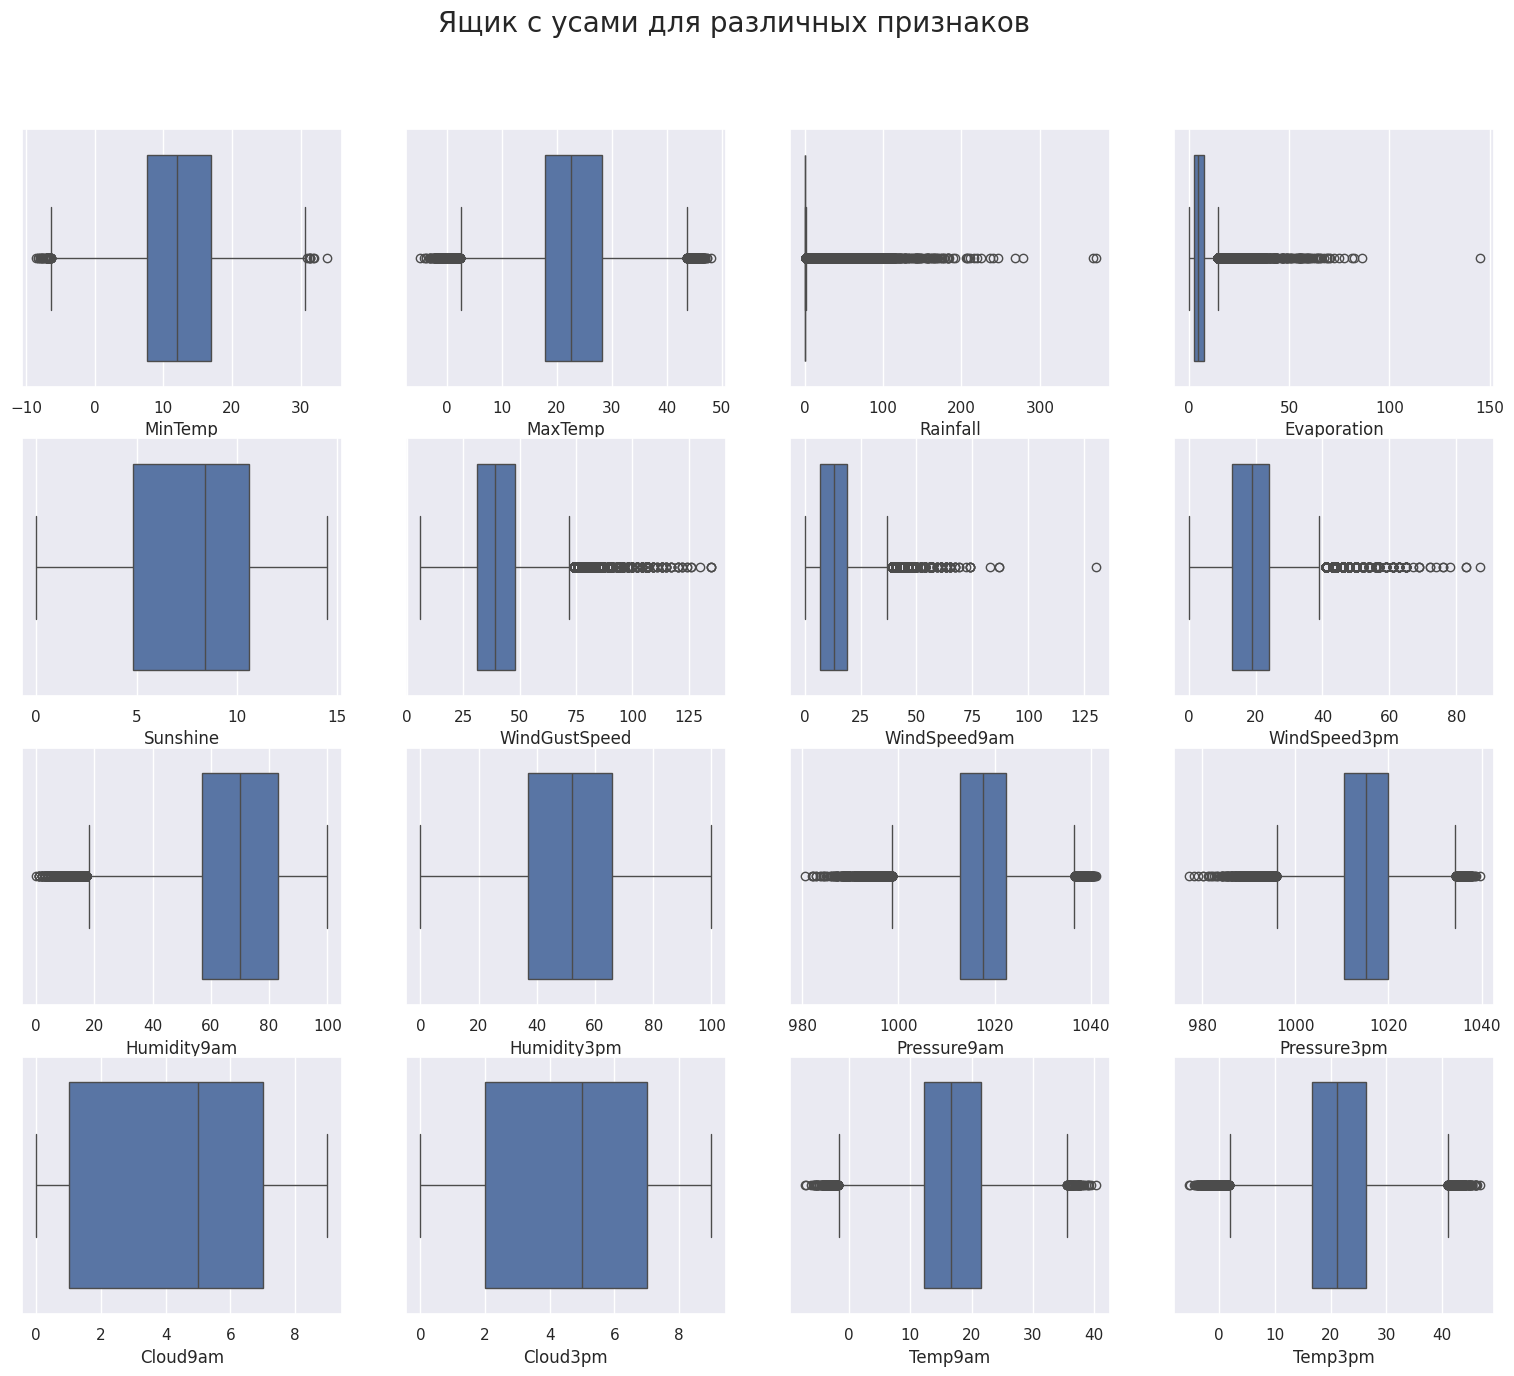

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(19, 15))
count = 0
for idx, feature in enumerate(df.select_dtypes(exclude='object').columns):
  sns.boxplot(x=df[feature], ax=axes[count // 4, count % 4])
  count += 1
fig.suptitle('Ящик с усами для различных признаков', fontsize=20)
plt.subplots_adjust(top=0.9)

Посмотрим на N последних выбросов с левой и с правой стороны

In [48]:
def get_top_n_anomalies(n):
  columns_max = ['max' + str(i) for i in range(n)]
  columns_min = ['min' + str(i) for i in range(n)]
  anomalies_df = pd.DataFrame(columns=columns_max+columns_min)
  for idx, feature in enumerate(df.select_dtypes(exclude='object').columns):
    # по правилу трех сигм
    std = df[feature].std()
    mean = df[feature].mean()

    # или через 1.5 iqr
    # q1 = df[feature].quantile(0.25)
    # q3 = df[feature].quantile(0.75)

    max_anomalies = df[df[feature] > mean + 3 * std][feature].sort_values(ascending=False).head(3)
    max_anomalies.index = columns_max[:max_anomalies.shape[0]]
    min_anomalies = df[df[feature] < mean - 3 * std][feature].sort_values(ascending=True).head(3)
    min_anomalies.index = columns_min[:min_anomalies.shape[0]]
    anomalies = pd.concat([max_anomalies, min_anomalies])
    anomalies_df = pd.concat([anomalies_df, anomalies.to_frame().T])
  return anomalies_df

In [45]:
anomalies_df = get_top_n_anomalies(3)
anomalies_df

,max0,max1,max2,min0,min1,min2
MinTemp,33.9,31.9,31.8,-8.5,-8.2,-8.2
MaxTemp,48.1,47.3,47.3,-4.8,-4.1,-3.8
Rainfall,371.0,367.6,278.4,NaN,NaN,NaN
Evaporation,145.0,86.2,82.4,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,135.0,135.0,135.0,NaN,NaN,NaN
WindSpeed9am,130.0,87.0,87.0,NaN,NaN,NaN
WindSpeed3pm,87.0,83.0,83.0,NaN,NaN,NaN
Humidity9am,NaN,NaN,NaN,0.0,1.0,1.0
Humidity3pm,NaN,NaN,NaN,NaN,NaN,NaN


В целом, выглядит все реалистично:
- минимальная температура может быть и минусовой в пустынях
- скорость ветра измеряется в км/ч, поэтому значения за 100 вполне реальны
- другие показатели в реалистичных пределах

Немного смущает максимальные показатели осадков (Rainfall), но, скорее всего, это правда.

UPD: Зарегистрированный рекорд по осадкам за один день - 1825 мм, поэтому укладываемся :)

## Распределение числовых признаков

In [46]:
locations = df['Location'].unique()
print(f'Список всех локаций в датасете: {sorted(locations.tolist())}')

Список всех локаций в датасете: ['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar', 'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart', 'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle', 'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale', 'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville', 'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia', 'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera']


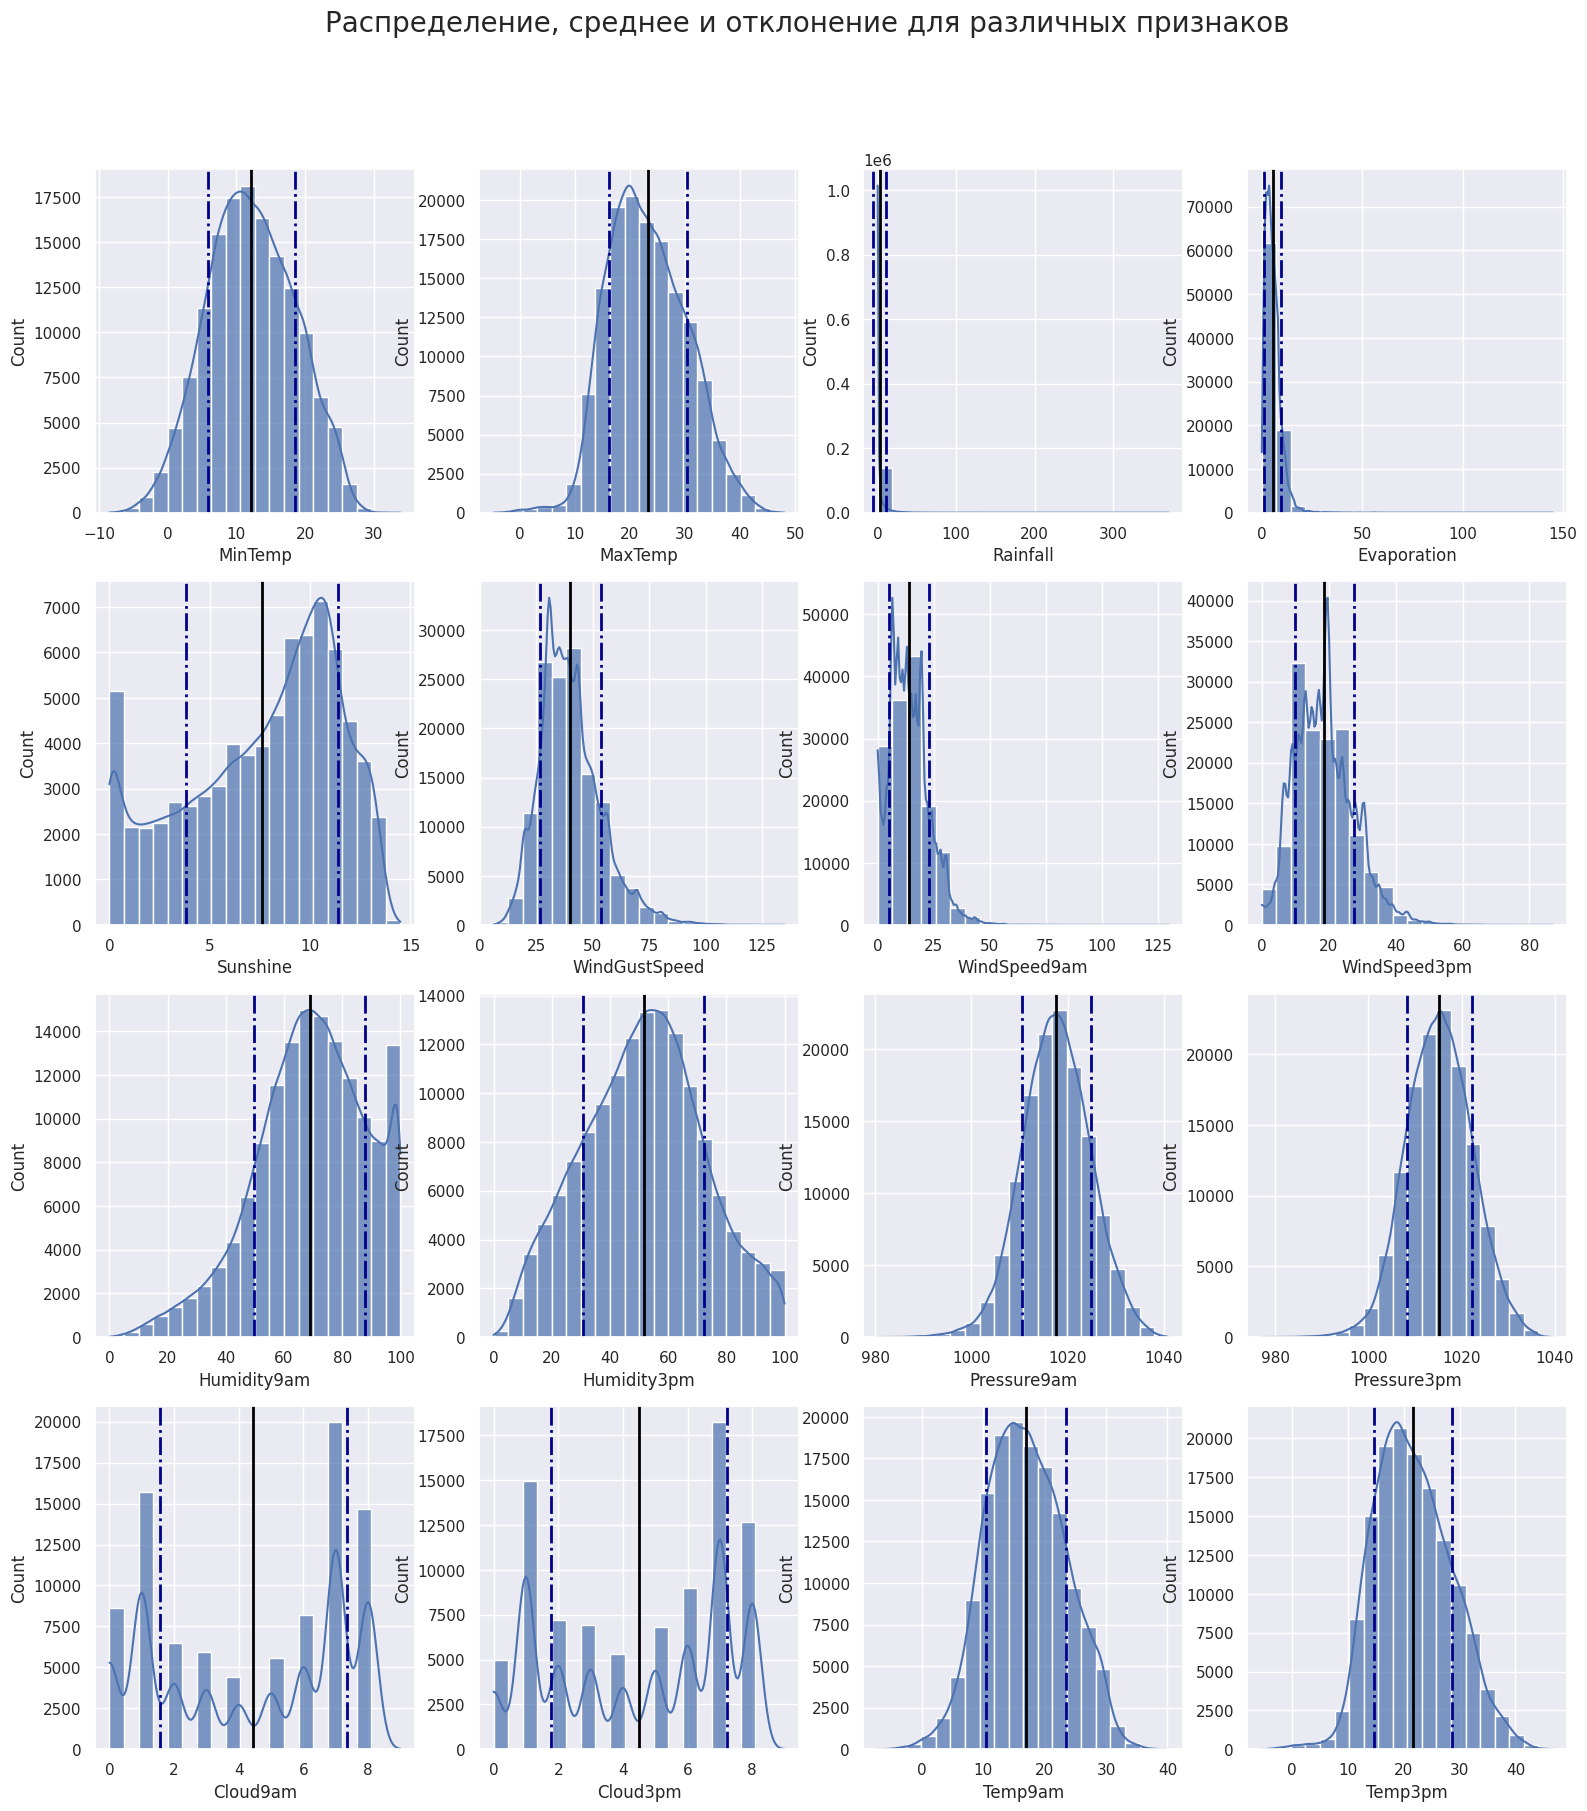

In [48]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(19, 20))
count = 0
for idx, feature in enumerate(df.select_dtypes(exclude='object').columns):
  sns.histplot(x=df[feature], kde=True, ax=axes[count // 4, count % 4], bins=20, alpha=0.7)

  mean = df[feature].mean()
  std = df[feature].std()

  axes[count // 4, count % 4].axvline(mean, color='black', lw=2)
  axes[count // 4, count % 4].axvline(mean + std, color='darkblue', ls='-.', lw=2)
  axes[count // 4, count % 4].axvline(mean - std, color='darkblue', ls='-.', lw=2)

  count += 1
fig.suptitle('Распределение, среднее и отклонение для различных признаков', fontsize=20)
plt.subplots_adjust(top=0.9)

Построим график распределения, визуализации среднего и отклонения за весь период наблюдения для конкретной локации

In [49]:
def histplot_by_location(location):
  fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(19, 20))
  count = 0
  for idx, feature in enumerate(df.select_dtypes(exclude='object').columns):
    sns.histplot(x=df[df['Location'] == location][feature], kde=True, ax=axes[count // 4, count % 4], bins=20, alpha=0.7)

    mean = df[df['Location'] == location][feature].mean()
    std = df[df['Location'] == location][feature].std()

    axes[count // 4, count % 4].axvline(mean, color='black', lw=2)
    axes[count // 4, count % 4].axvline(mean + std, color='darkblue', ls='-.', lw=2)
    axes[count // 4, count % 4].axvline(mean - std, color='darkblue', ls='-.', lw=2)

    count += 1
  fig.suptitle('Распределение, среднее и отклонение для различных признаков для локации: ' + location, fontsize=20)
  plt.subplots_adjust(top=0.9)

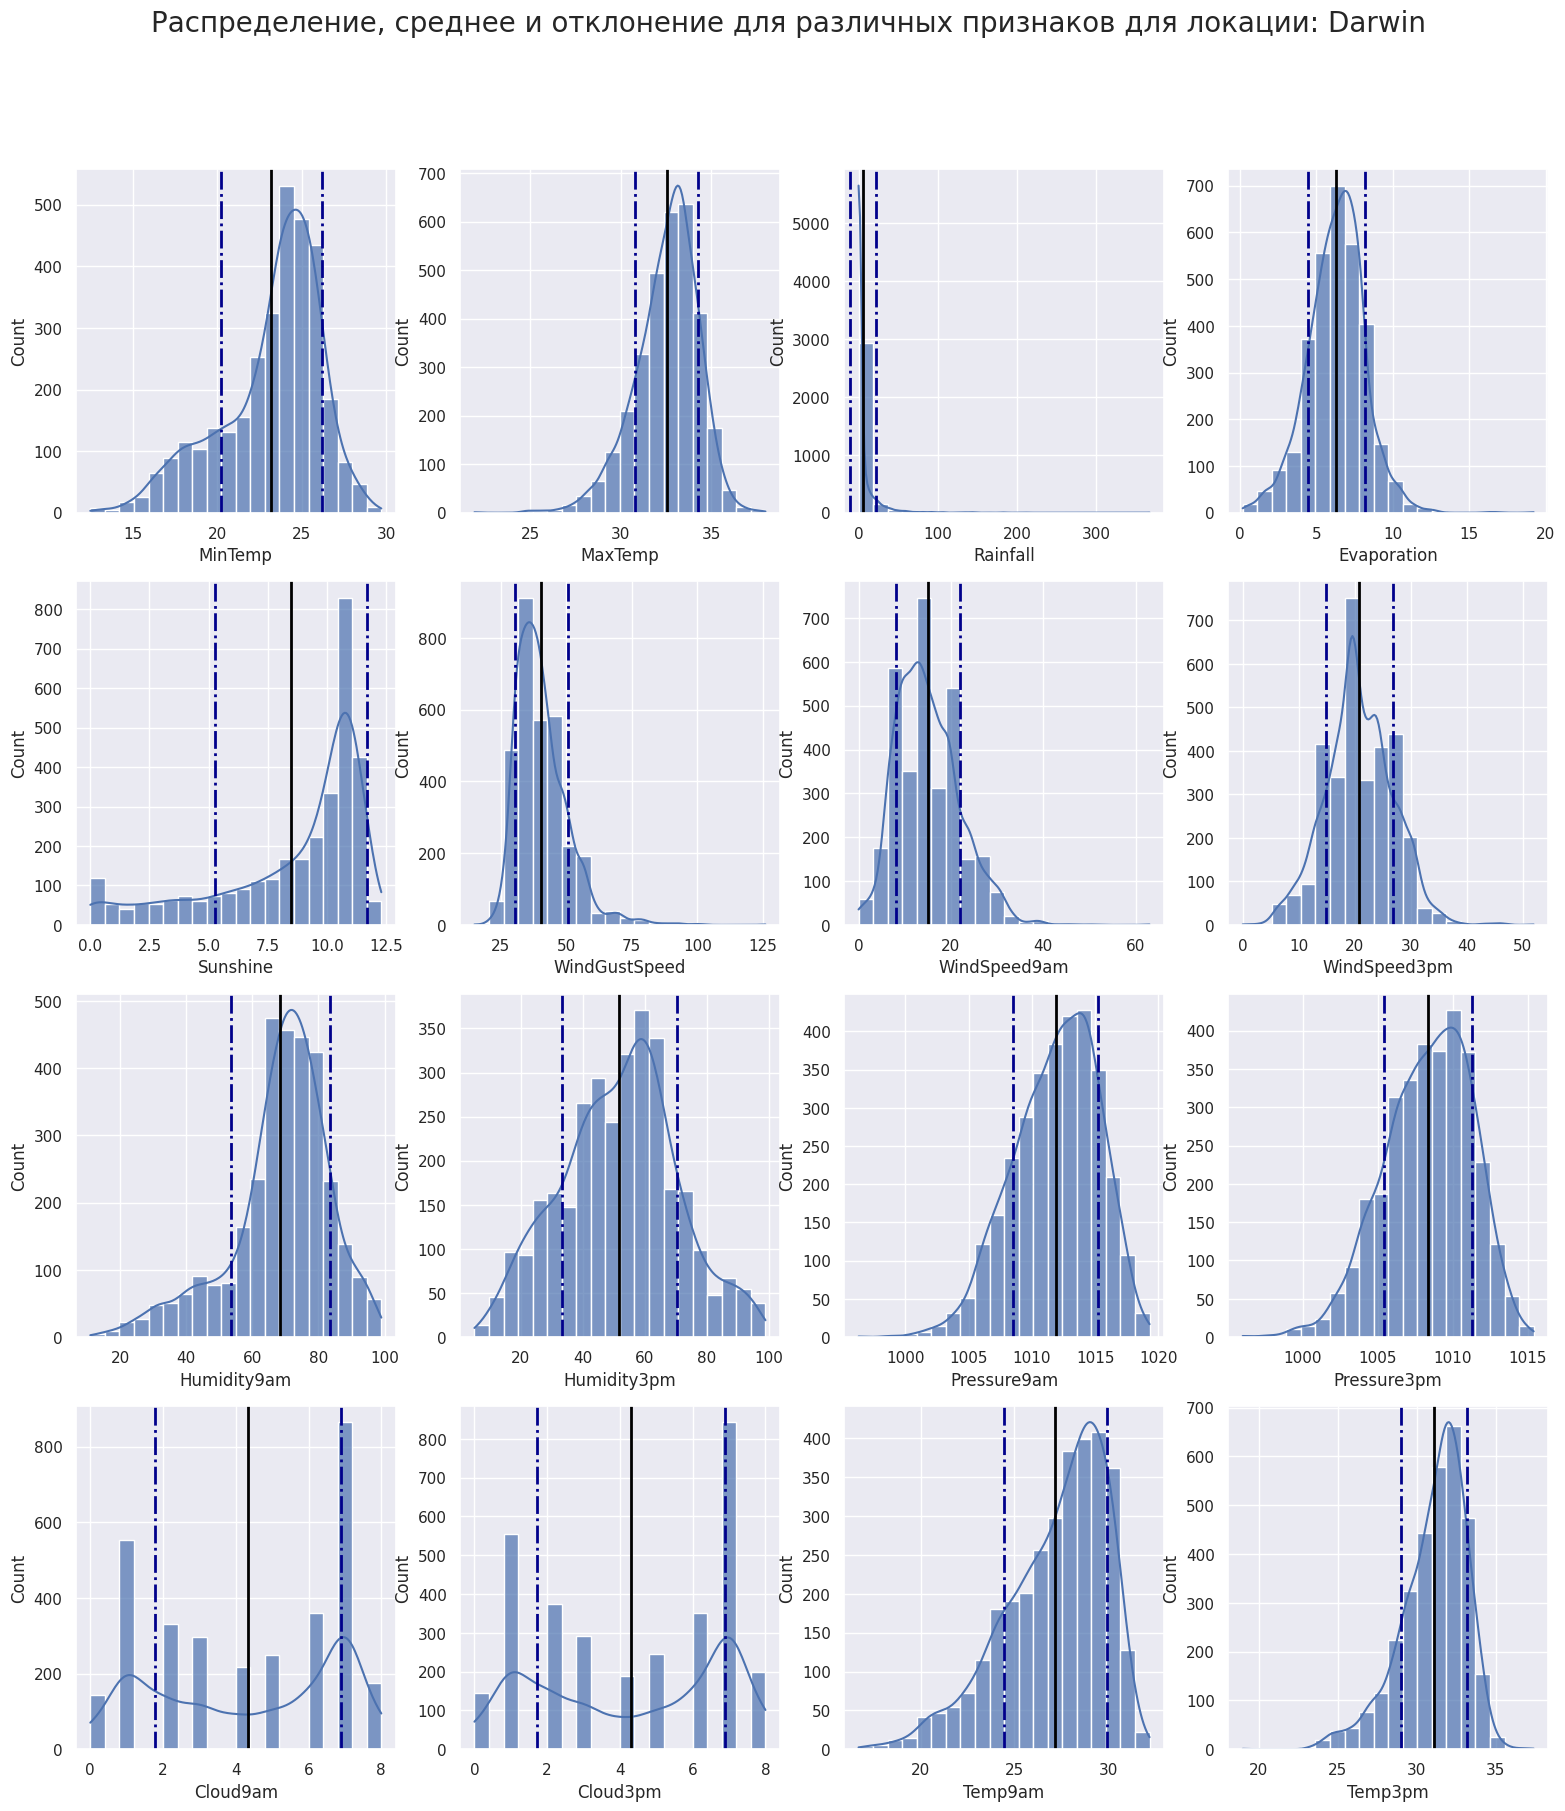

In [50]:
histplot_by_location('Darwin')

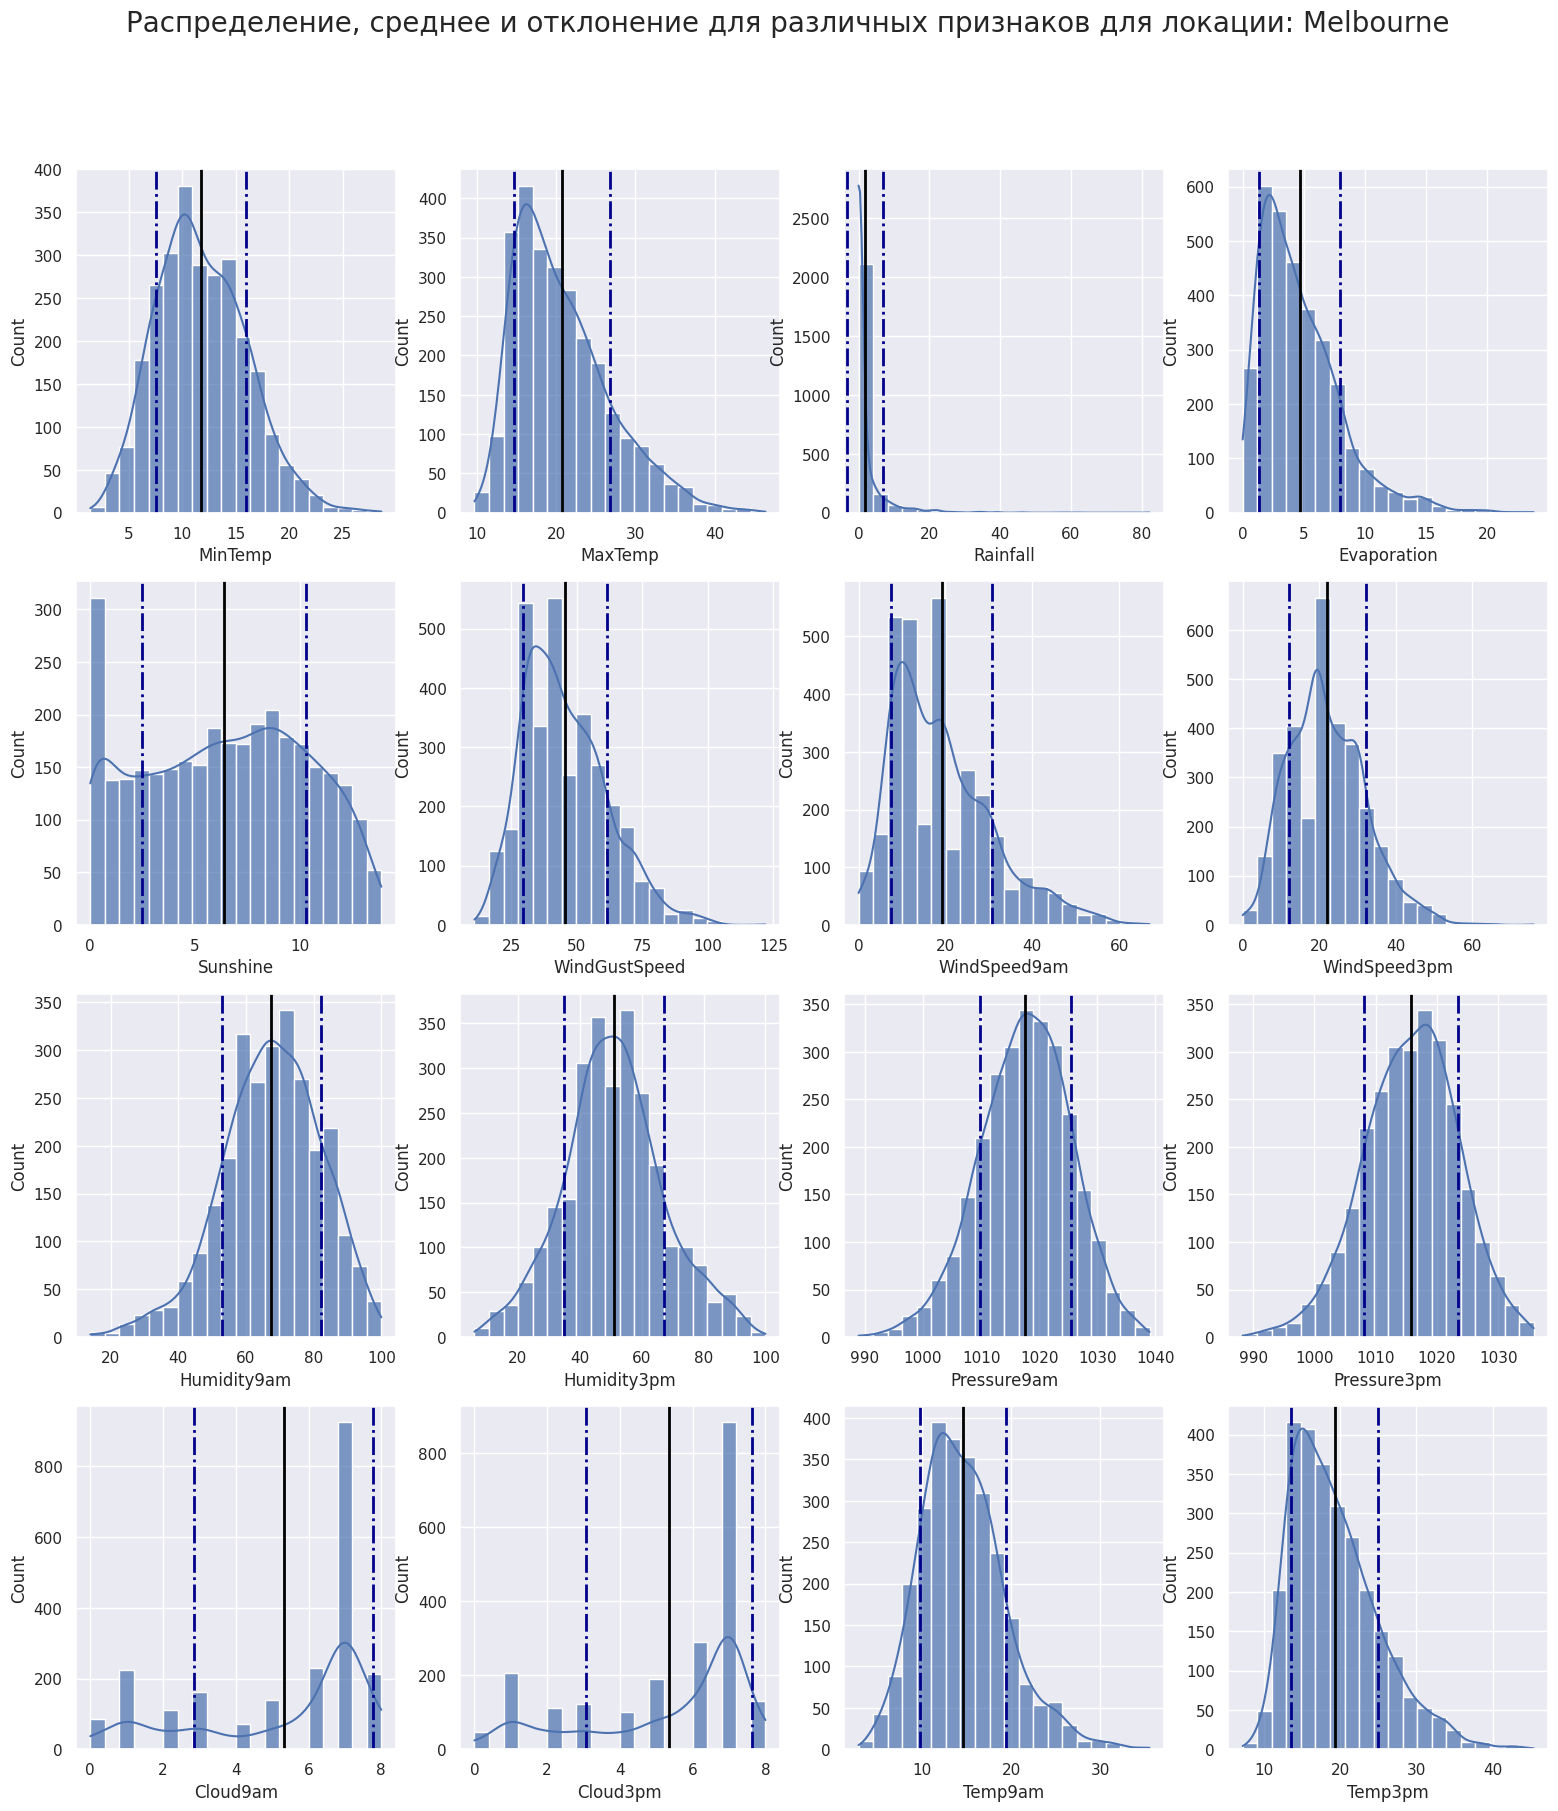

In [51]:
histplot_by_location('Melbourne')

Чтобы удобнее было сравнивать распределения, построим функцию, которая принимает на вход список локаций, а на выходе возвращает общие графики



In [52]:
from matplotlib.lines import Line2D

def сompare_kdeplot_by_locations(locations):
  colors = {location: np.random.rand(3,) for location in locations}

  fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(19, 20))
  count = 0
  for idx, feature in enumerate(df.select_dtypes(exclude='object').columns):
    for location in locations:
      c = colors[location]
      sns.kdeplot(x=df[df['Location'] == location][feature], ax=axes[count // 4, count % 4], color=c)

      mean = df[df['Location'] == location][feature].mean()
      std = df[df['Location'] == location][feature].std()

      axes[count // 4, count % 4].axvline(mean, lw=2, color=c)
      axes[count // 4, count % 4].axvline(mean + std, ls='-.', lw=2, color=c)
      axes[count // 4, count % 4].axvline(mean - std, ls='-.', lw=2, color=c)

    count += 1

  legend_elements = []
  for location, color in colors.items():
        legend_elements.append(Line2D([0], [0], color=color, lw=2, label=location))
  fig.legend(handles=legend_elements, loc='lower center', ncol=len(locations) + 2, bbox_to_anchor=(0.5, -0.05))
  fig.suptitle('Распределение, среднее и отклонение для различных признаков', fontsize=20)
  plt.subplots_adjust(top=0.9)

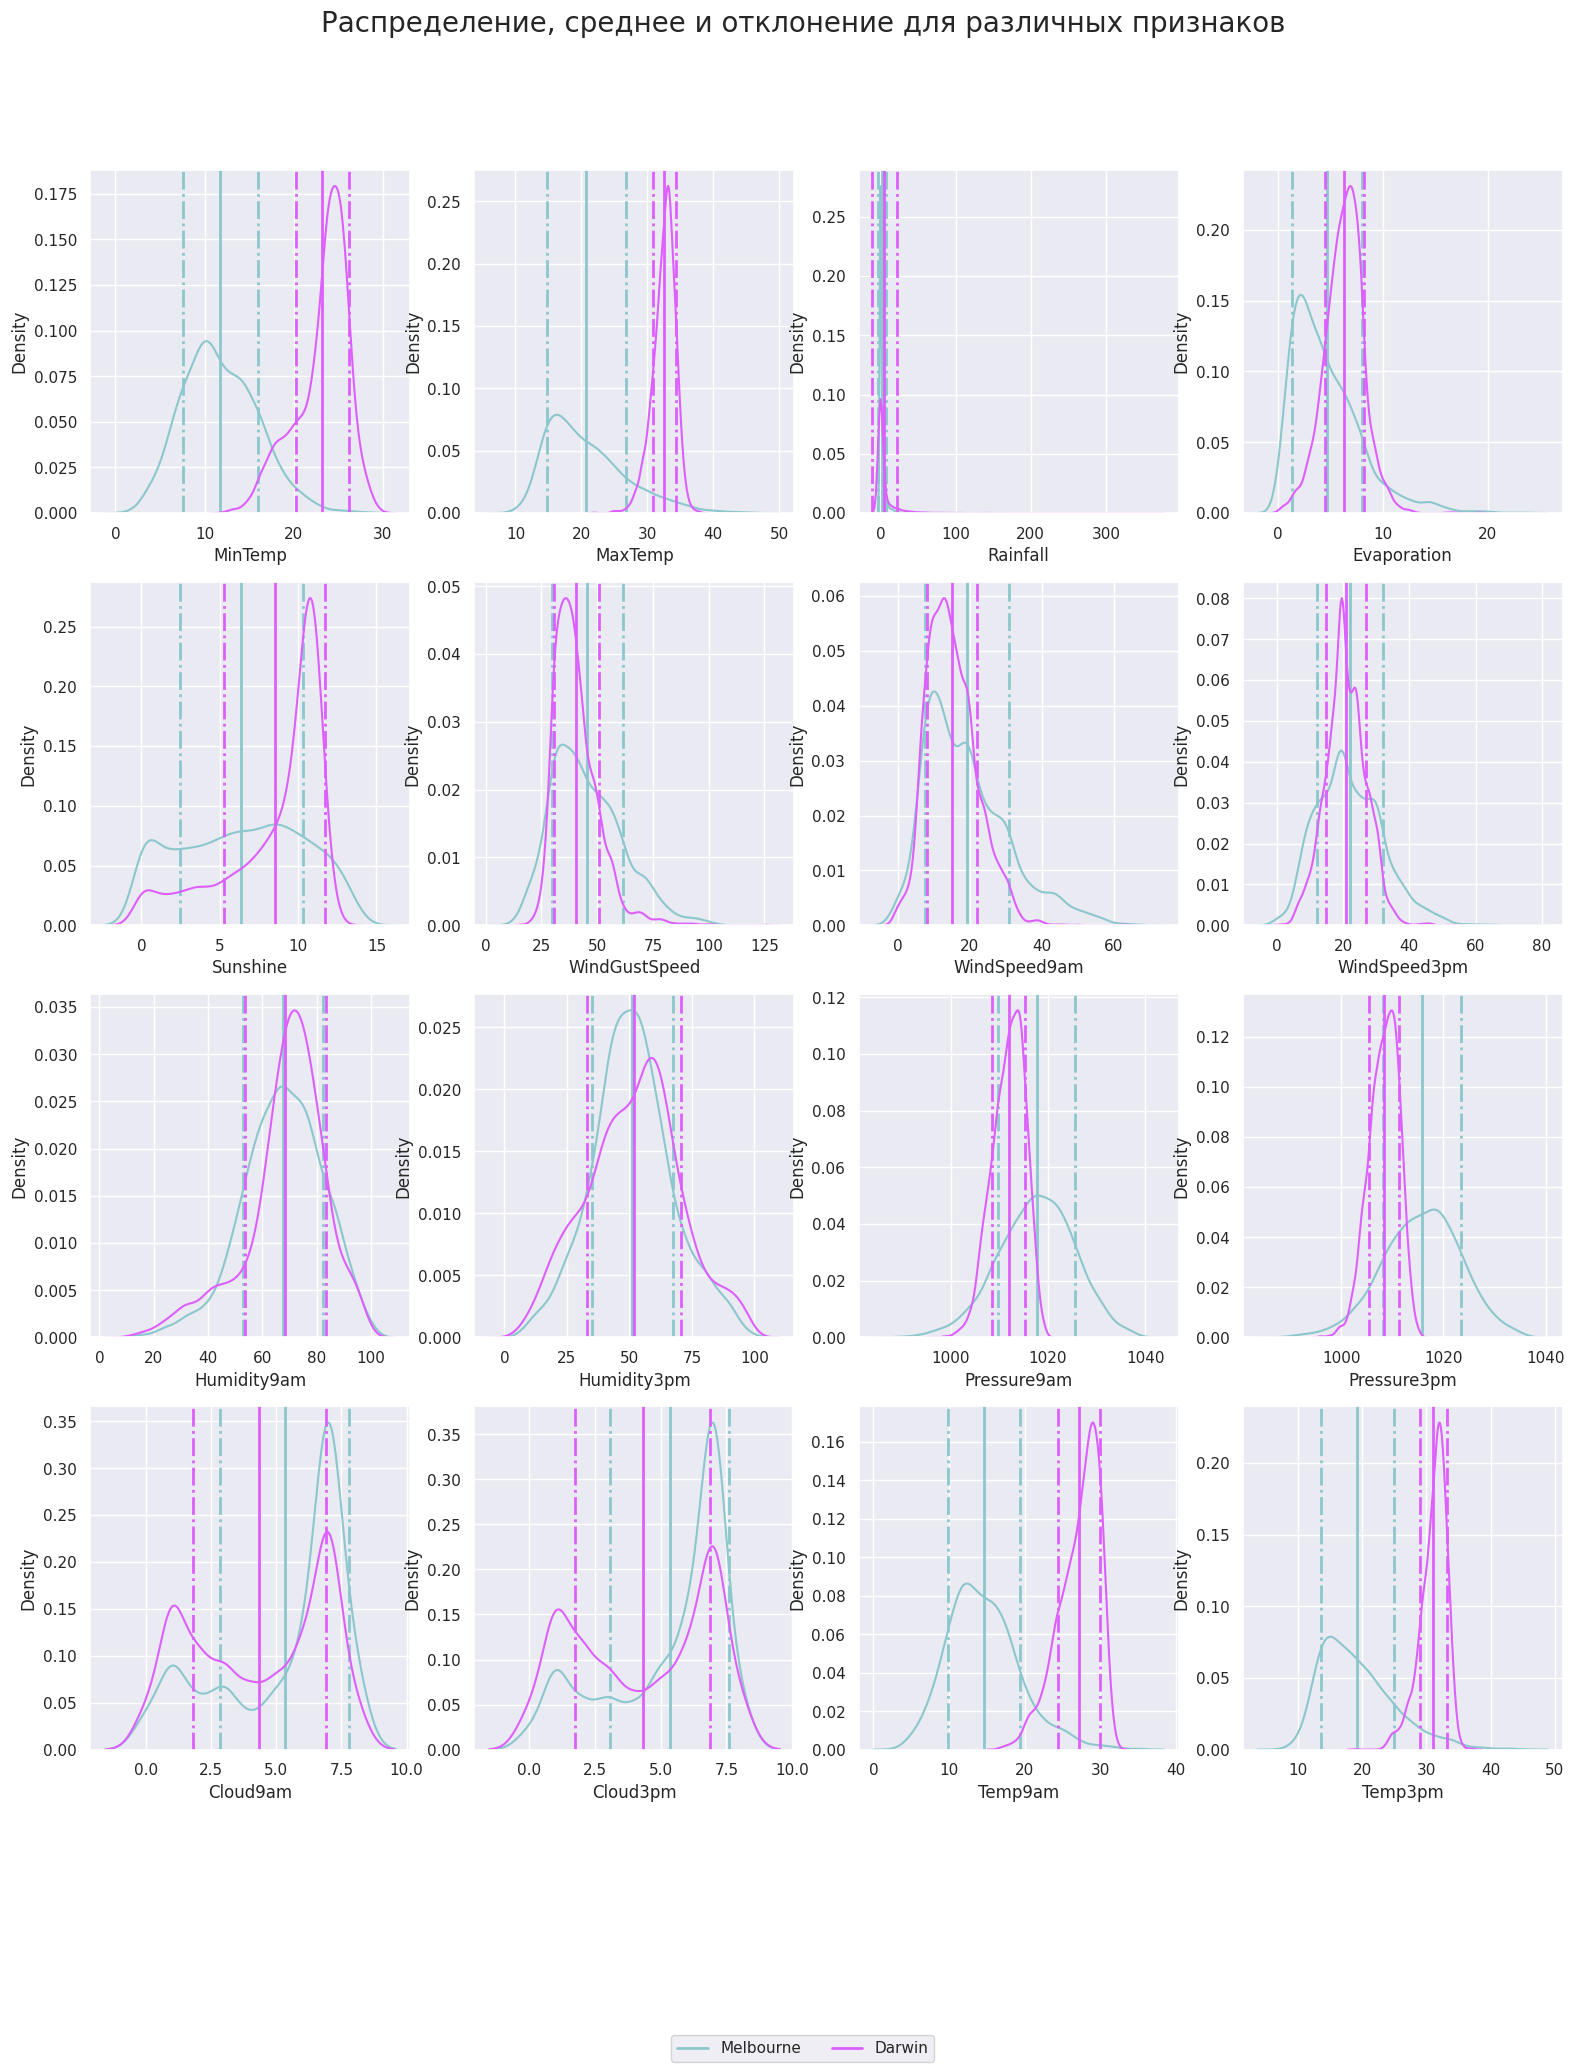

In [62]:
сompare_kdeplot_by_locations(['Melbourne', 'Darwin'])

In [54]:
print('Период наблюдений для всех локаций совпадает')
df[df['Location'] == 'Darwin'].shape[0], df[df['Location'] == 'Melbourne'].shape[0]

Период наблюдений для всех локаций совпадает


(3193, 3193)

Предствленые графики распределения, визуализация среднего и отклонения для различных признаков за весь период наблюдений для городов Дарвин и Мельбурн.

Визуализация отчетливо показывает, как отличается климат на севере и на юге страны:   
- На севере страны более жаркий климат. Средние значения дневного максимума и минимума температуры между городами больше чем на 10°C  
- На юге температуры имеют большие отклонения
- В Дарвине давление ниже
- В Мельбурне в среднем скорость ветра больше, чем в Дарвине
- Влажность выше на севере (субэкваториальный климат)
- и др.

Некоторые признаки имеют похожее распределние, но разные немного отличаются по значениям. Например, похожее распределение имеют признаки влажность и облачность.

Вывод: локация играет существенную роль в предсазании

# Категориальные признаки

Построим bar для сравнения категореальных признаков

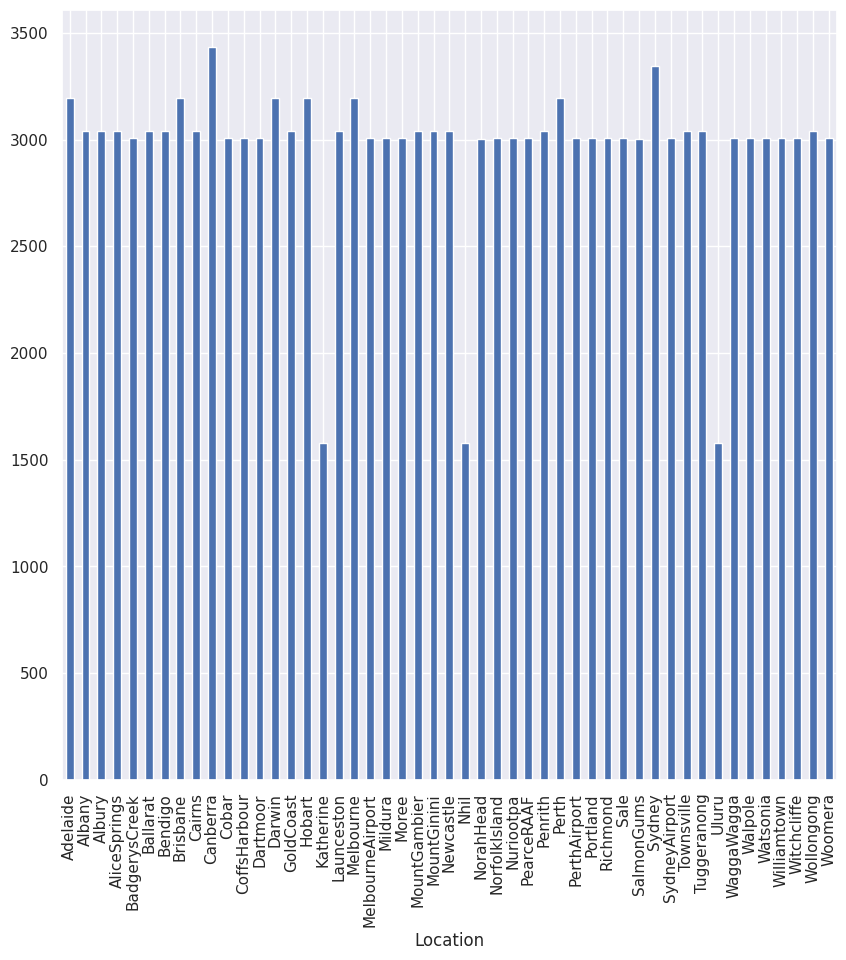

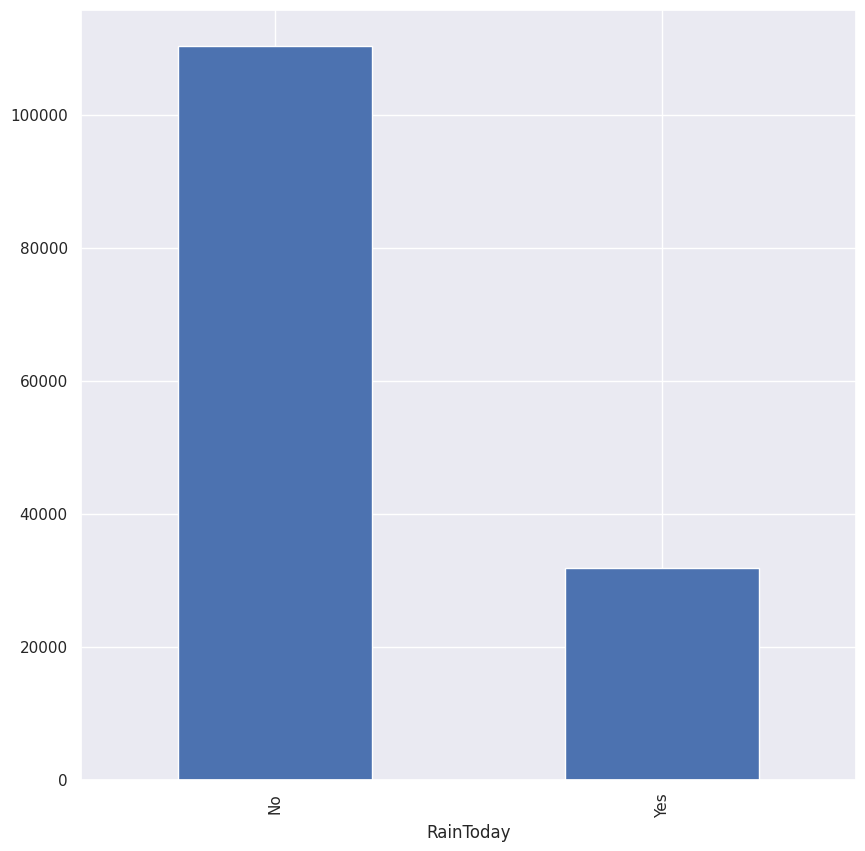

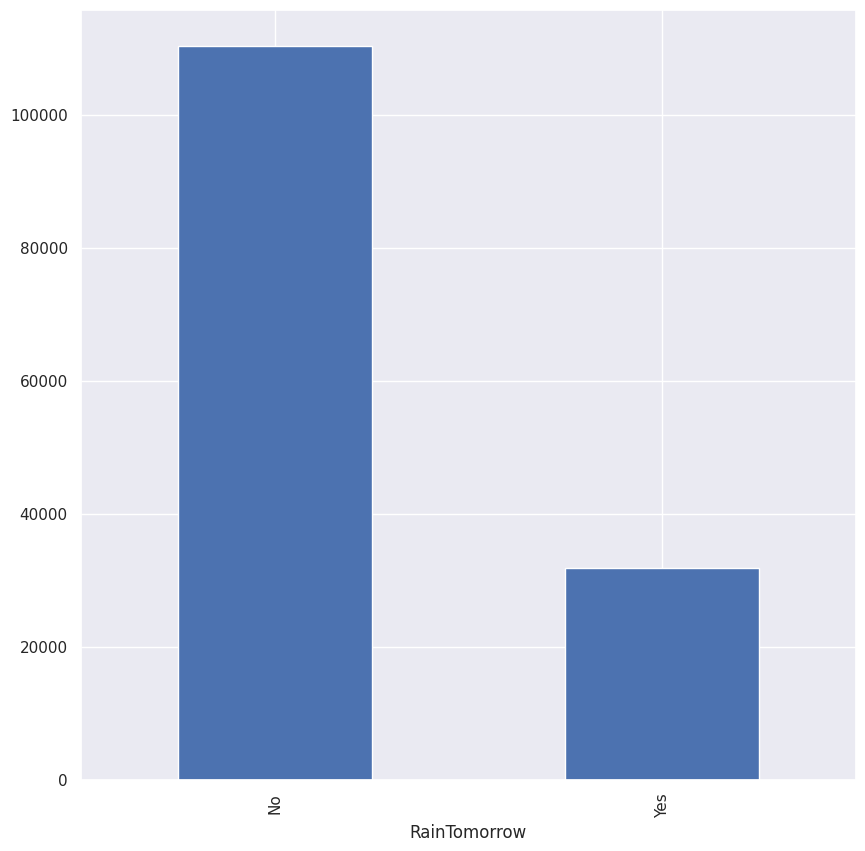

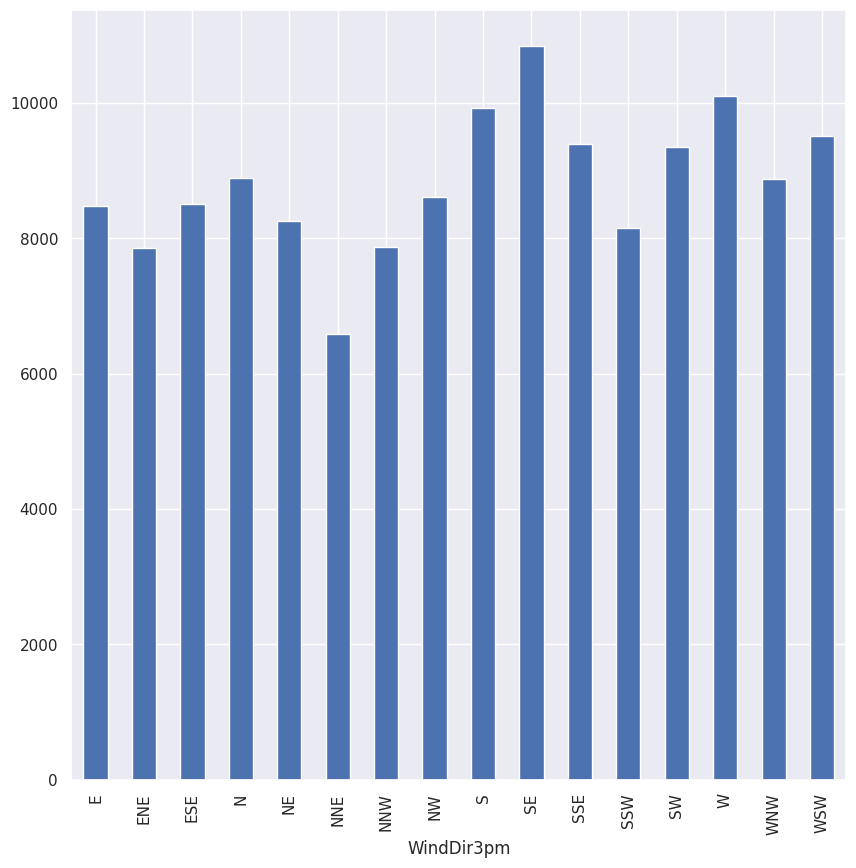

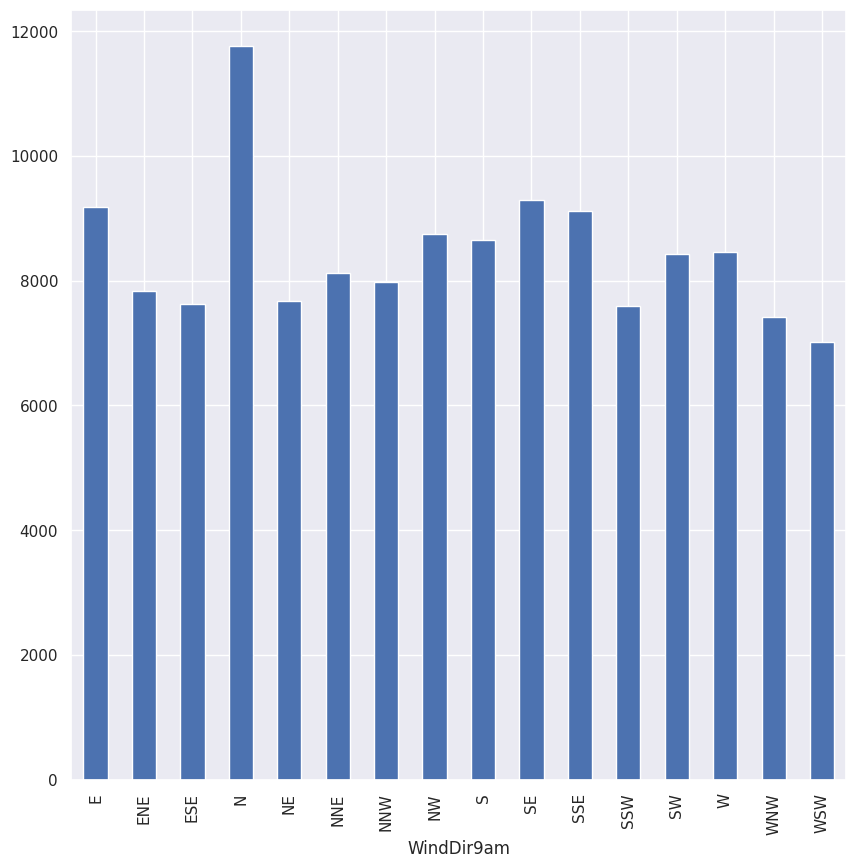

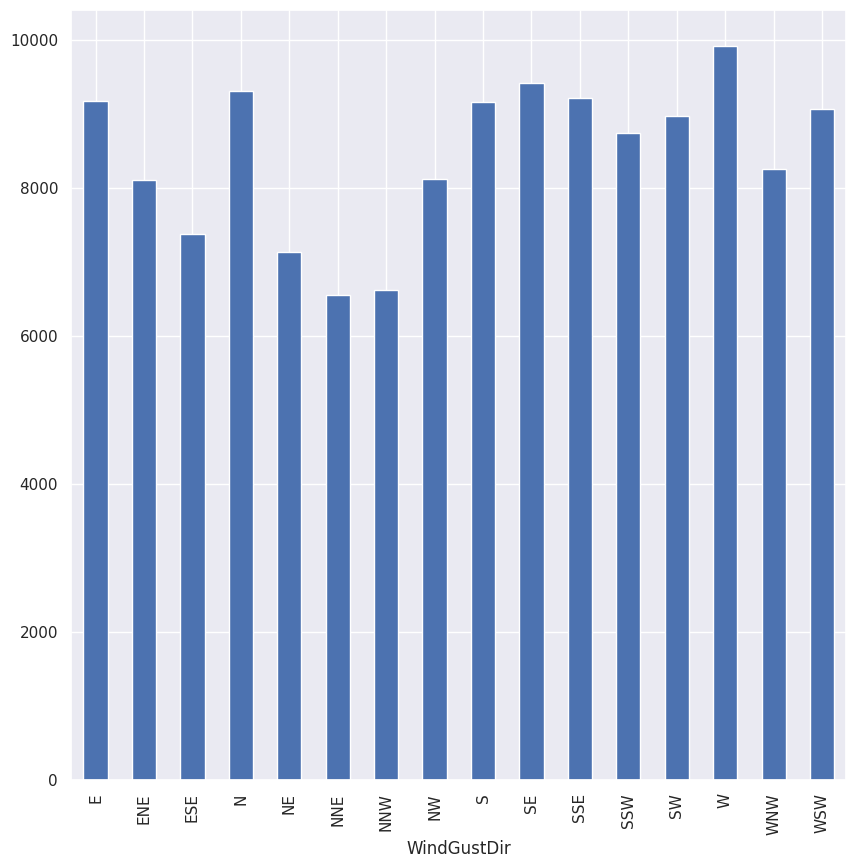

In [57]:
for idx, feature in enumerate(df.select_dtypes(include='object').columns.difference(['Date'])): # уберем дату
  plt.figure(figsize=(10, 10))
  df.groupby(feature).size().plot(kind='bar')
  plt.show()

Из графиков можно сделать несколько открытий:
- Все-таки НЕ на всех локациях одинаковое количество измерений. При дальнейшем анализе это необходимо будет учесть
- В Австралии дней без дождя больше в три раза, чем дней с дождем
- В 9.00 утра чаще всего дует ветер с севера


Построим bar для сравнения категореальных признаков по определенной локации

In [59]:
def bars_by_location(location):
  for idx, feature in enumerate(df.select_dtypes(include='object').columns.difference(['Date'])): # уберем дату
    plt.figure(figsize=(10, 10))
    df[df['Location'] == location].groupby(feature).size().plot(kind='bar')
    plt.show()

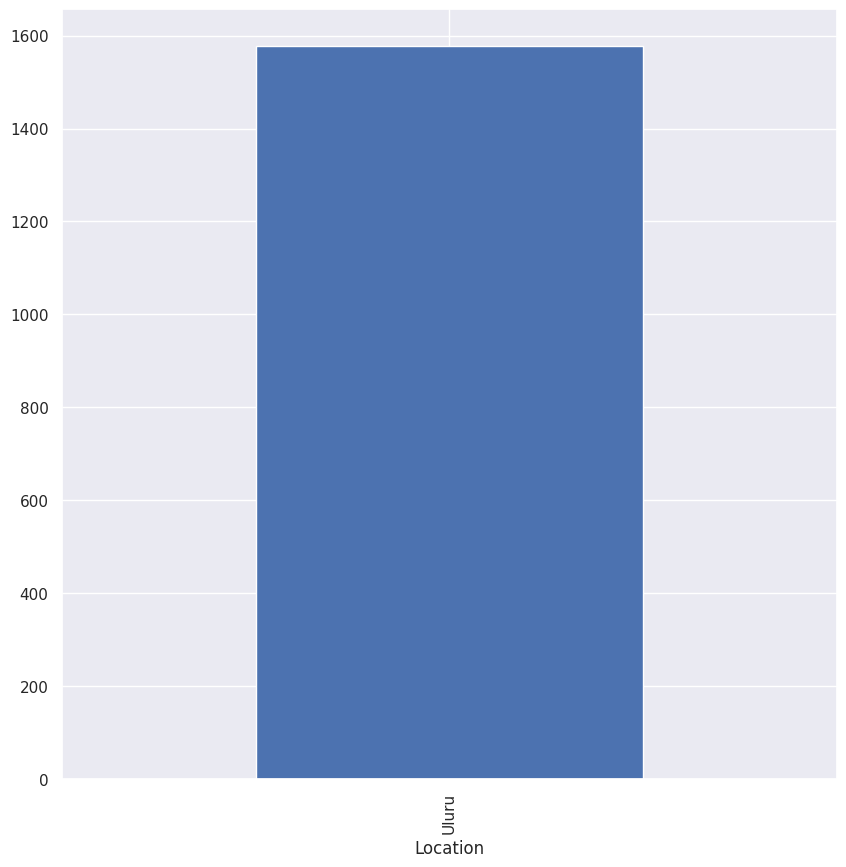

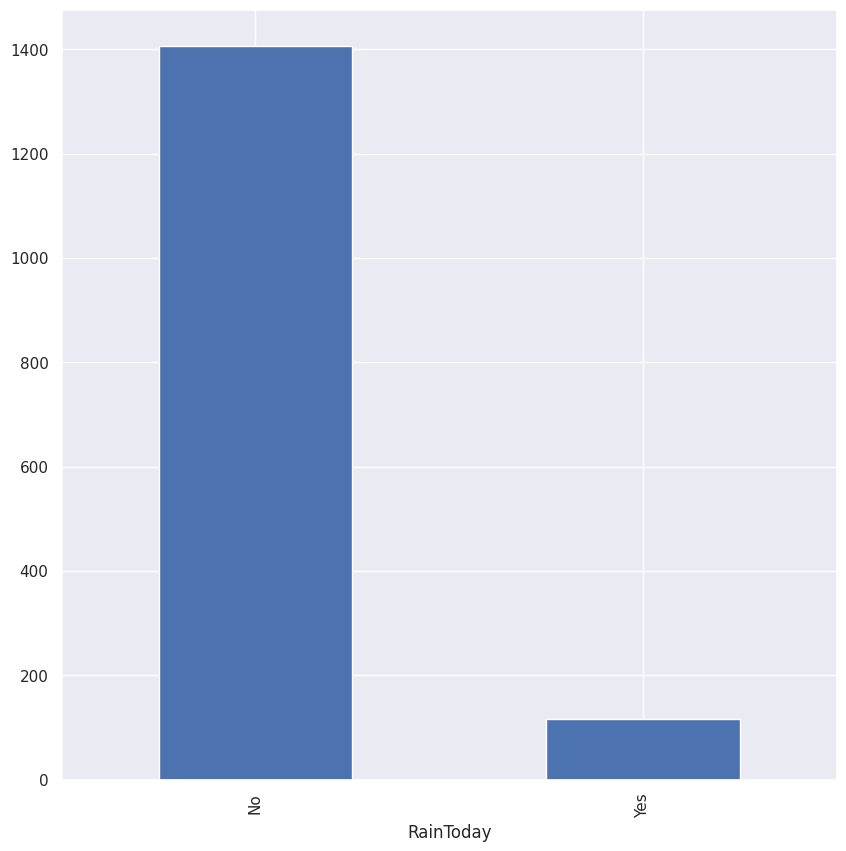

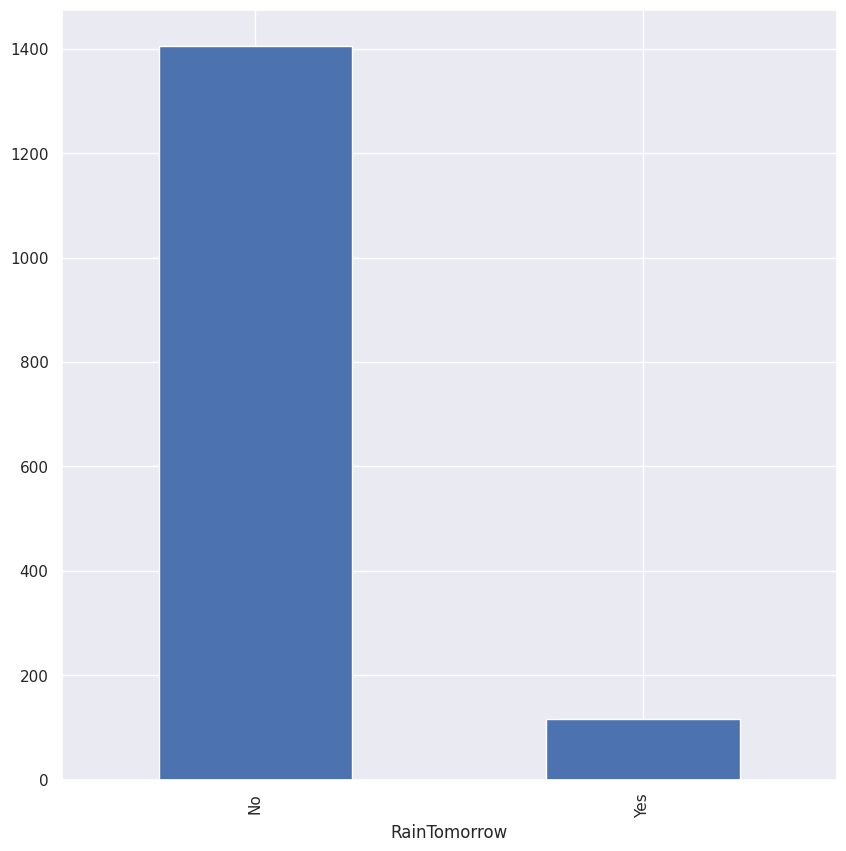

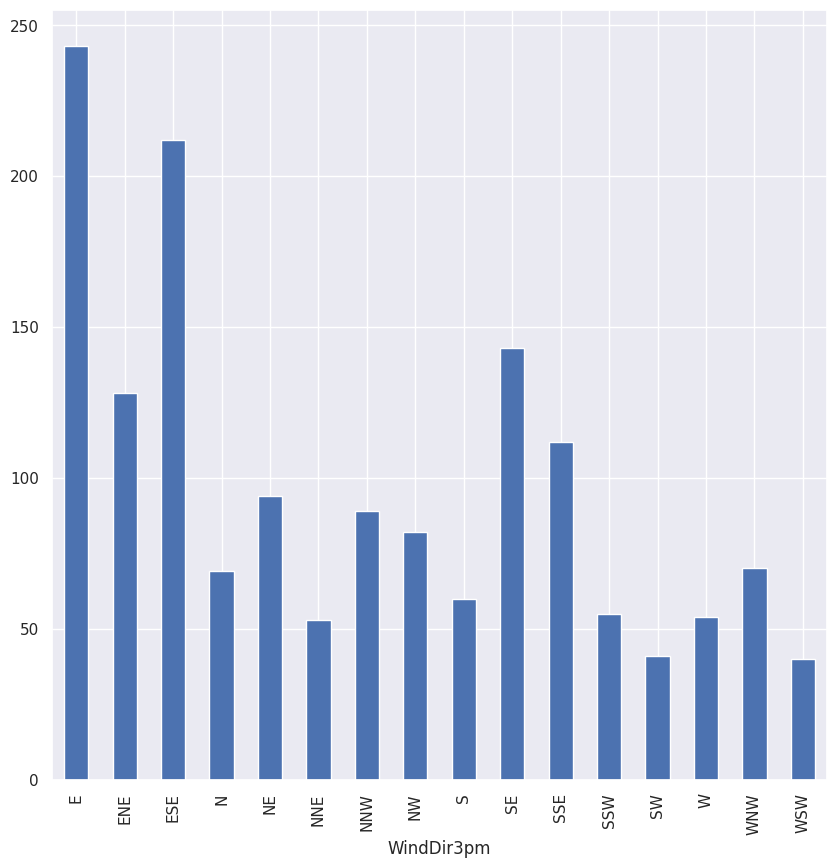

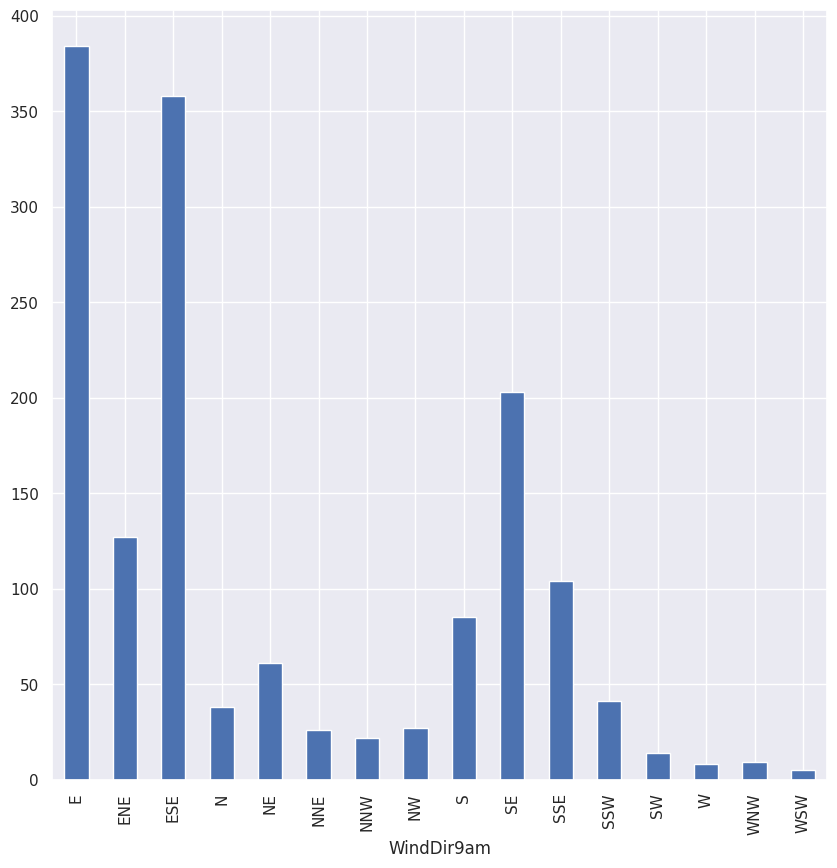

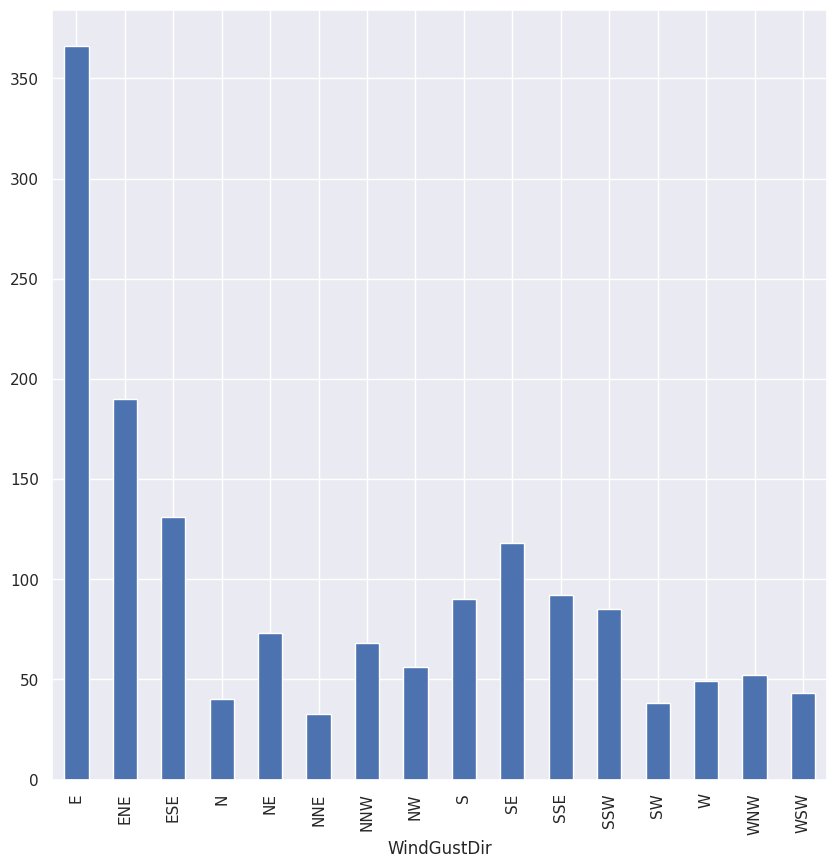

In [60]:
bars_by_location('Uluru')

Заметим, что для локации Uluru графики существенно отличаются по сравнению с графиками, построенным по всем наблюдениям

Так, например, в Uluru преобладают восточные ветра, а дней с дождем наблюдается горздо реже

Подготовим график для сравнения категориальных признаков от двух переменных

In [44]:
def compare_bars_by_location(location1, location2):
    df_combined = df[df['Location'].isin([location1, location2])]

    for feature in df_combined.select_dtypes(include='object').columns.difference(['Date']):
        plt.figure(figsize=(10, 10))
        sns.countplot(data=df_combined, x=feature, hue='Location', palette='Set1')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

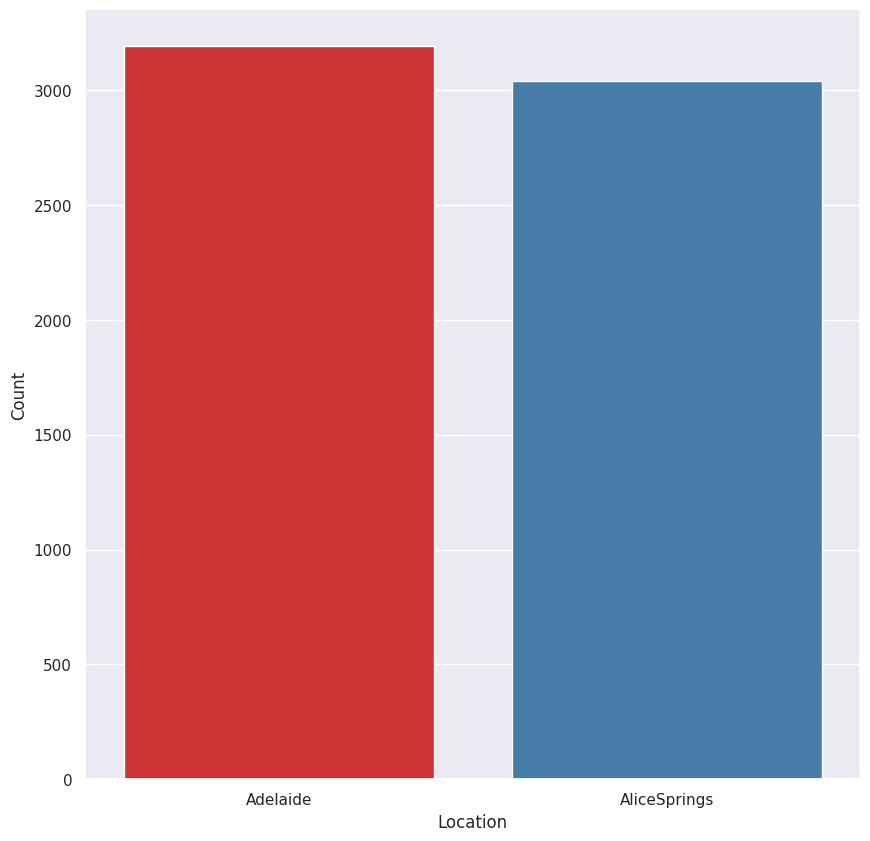

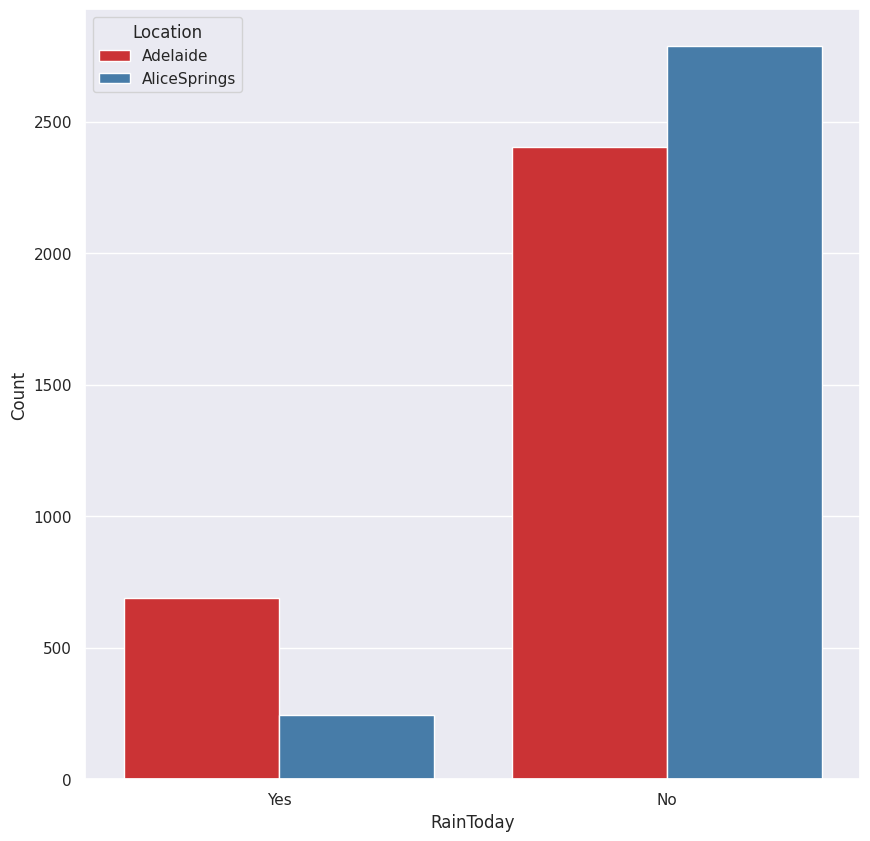

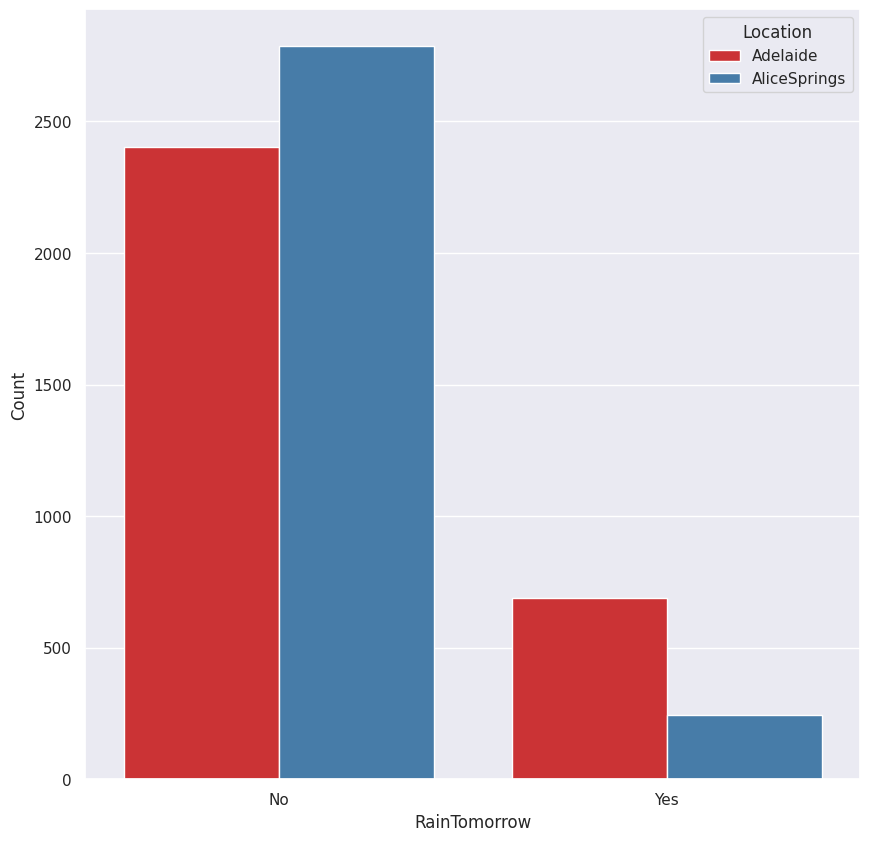

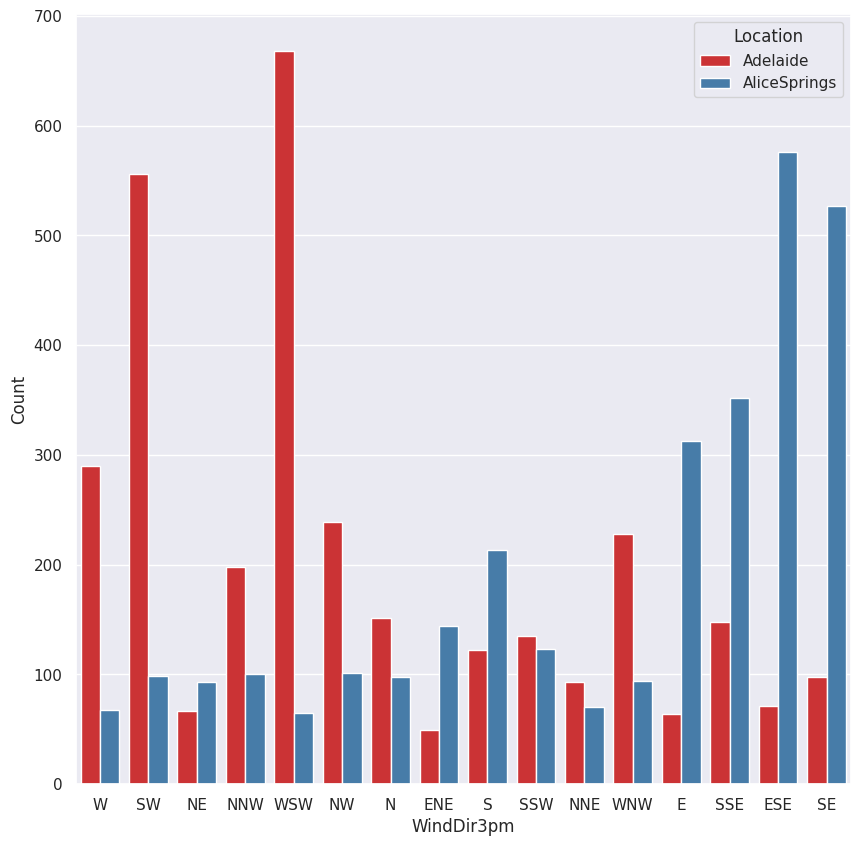

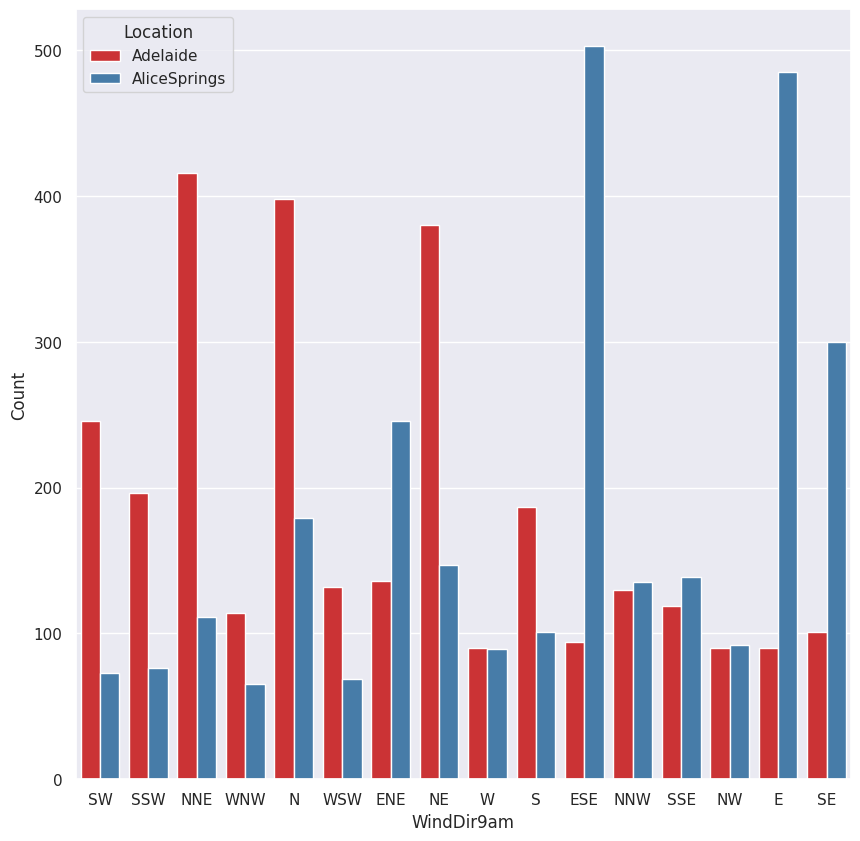

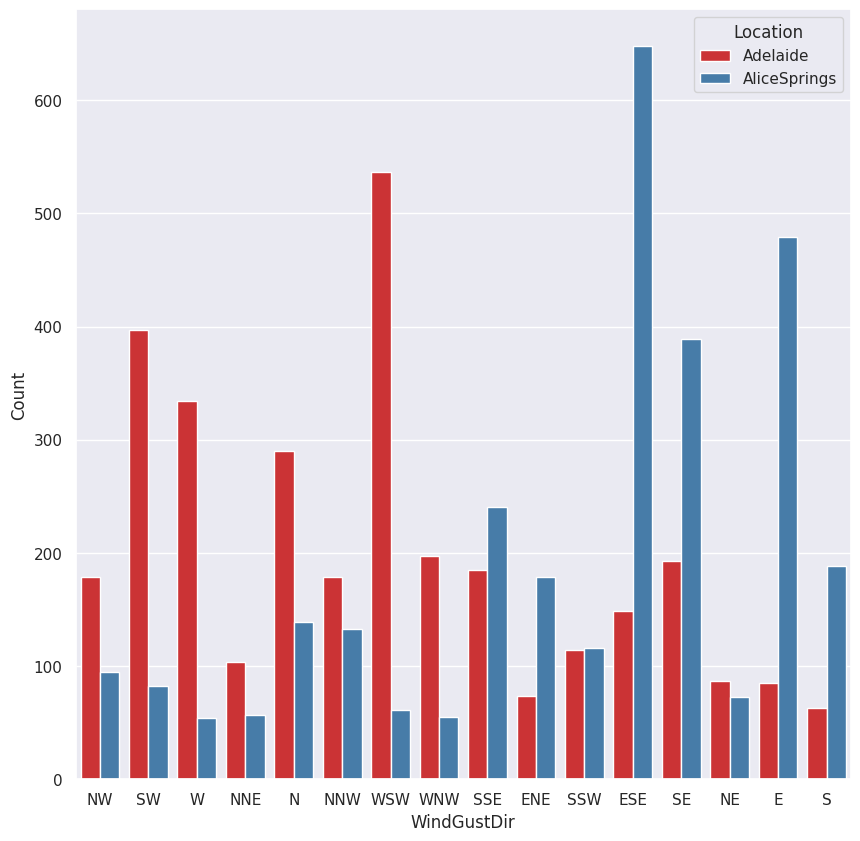

In [45]:
compare_bars_by_location('AliceSprings', 'Adelaide')

## OneHotEncoding

Применим OneHotEncoding к признакам RainToday, RainTomorrow

In [8]:
df_encoded = pd.get_dummies(df, columns=["RainToday"], prefix="RainToday", dtype='int')
df_encoded = pd.get_dummies(df_encoded, columns=["RainTomorrow"], prefix="RainTomorrow", dtype='int')
df_encoded = df_encoded.drop(columns=['RainToday_No', 'RainTomorrow_No'])
df_encoded.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


Также можно кодировать признак направление ветра. Возможно, именно он влияет

# Исследование зависимостей признаков

Прежде чем построить матрицу корреляций, добавим еще один признак - разницу макс. и мин. температур. Посмотрим как зависит новый признак с признаком "идет ли дождь"

Также сравним как другие признаки зависят от целевых признаков и от друг друга

In [9]:
df_corr = df_encoded.copy()
df_corr['TempDiff'] = df_corr['MaxTemp'] - df_corr['MinTemp']

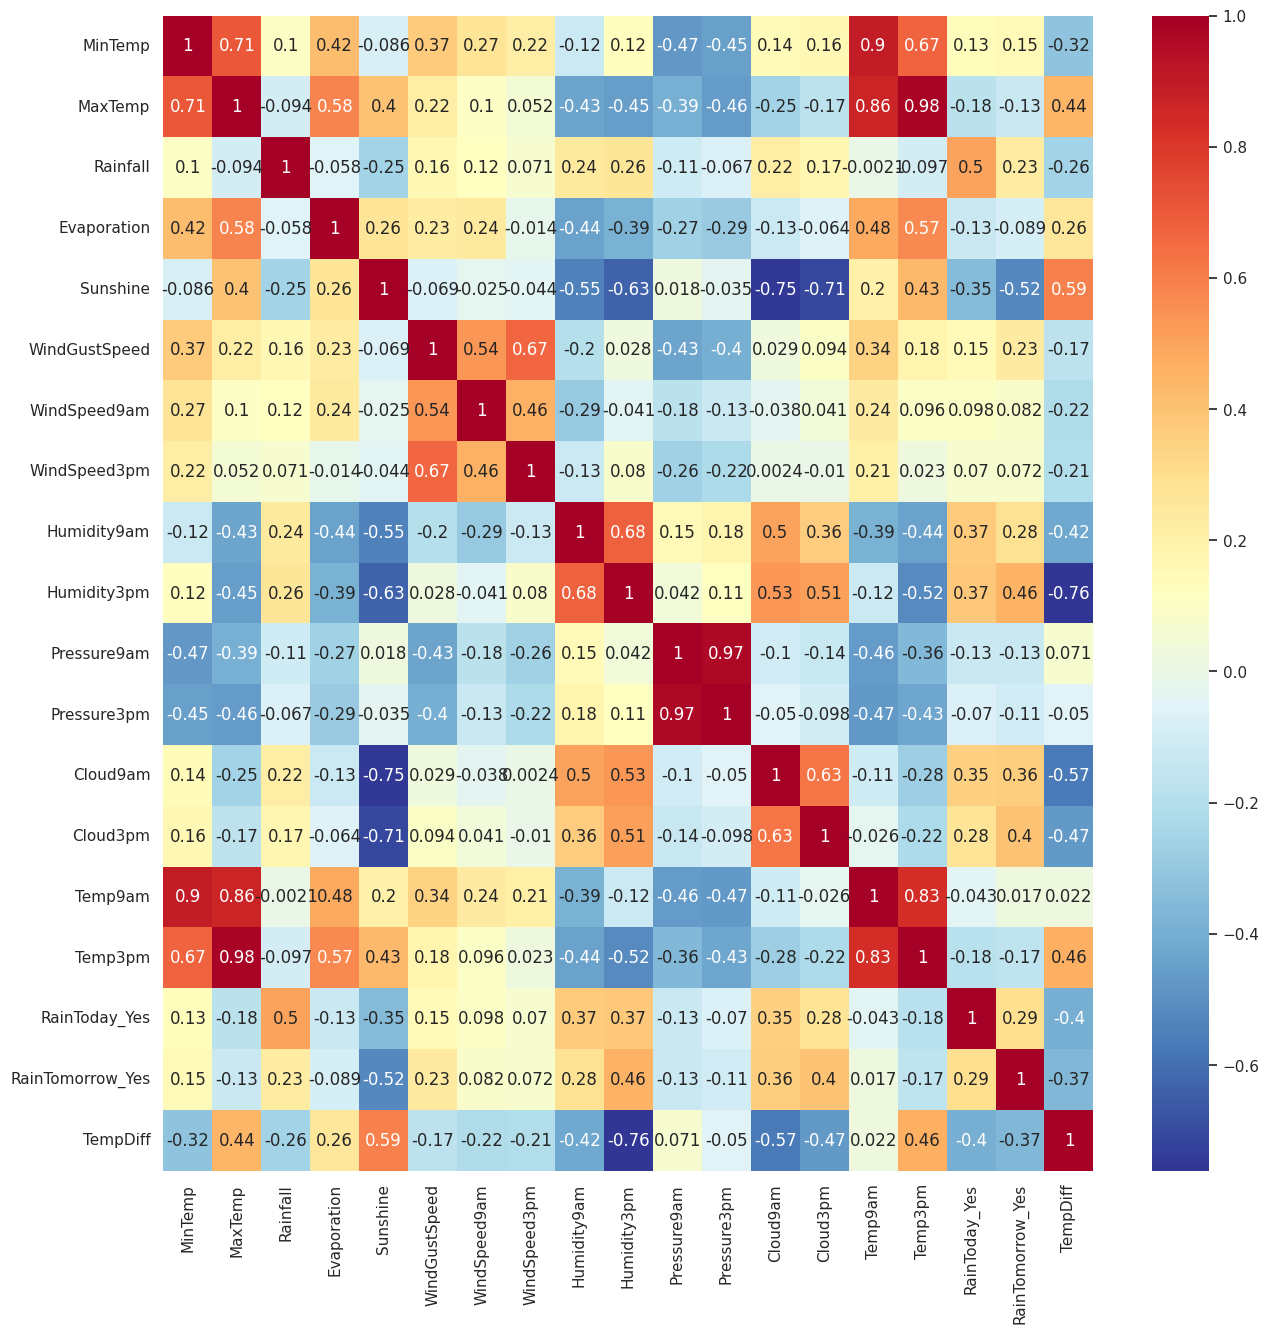

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr.select_dtypes(exclude='object').corr(), cmap="RdYlBu_r", annot=True);

Целевые признаки RainToday, RainTomorrow:
- как ни странно RainToday коррелирует с количеством выпадаемых осадков Rainfall
- есть зависимость целевых признаков с влажностью Humidity (0.35, 0.37).
- еще одна интереснаяя зависимость Humidity3pm и RainTomorrow_Yes (0.44). Это можно интерпретировать как днем было очень было влажно, поэтому вечером пошел дождь
- отрицательная линейная зависимость между дождем и количеством солнечных часов Sunshine и положительная с облачностью Cloud, что тоже вполе логично
- RainToday и RainTomorrow: если дождь пройдет сегодня, то он пройдет и завтра
- разность температур TempDiff отрицательно коррелирует с дождем. Изначально было предположение, что эта связь должна быть положительной: кажется, что дождь приносит похолодание. Однако получили обратную зависимость, которую можно интерпретировать так: в дождливые дни температура в течение дня особо не меняется, а, наоборот, в солнечные разница макисмальных и минимальных температур наблюдается лучше

Другие признаки:
- Sunshine, MaxTemp и Испарение Evaporation
- MaxTemp и Temp3pm - максимальная температура наблюдается в 3 часа дня
- MinTemp и Temp9am - максимальная температура наблюдается утром
- Влажность и Облачаность тоже взаимосвязаны (~0.5)

Посмотрим зависимость некоторых признаков с помощью Scatter plot (Pair plot)

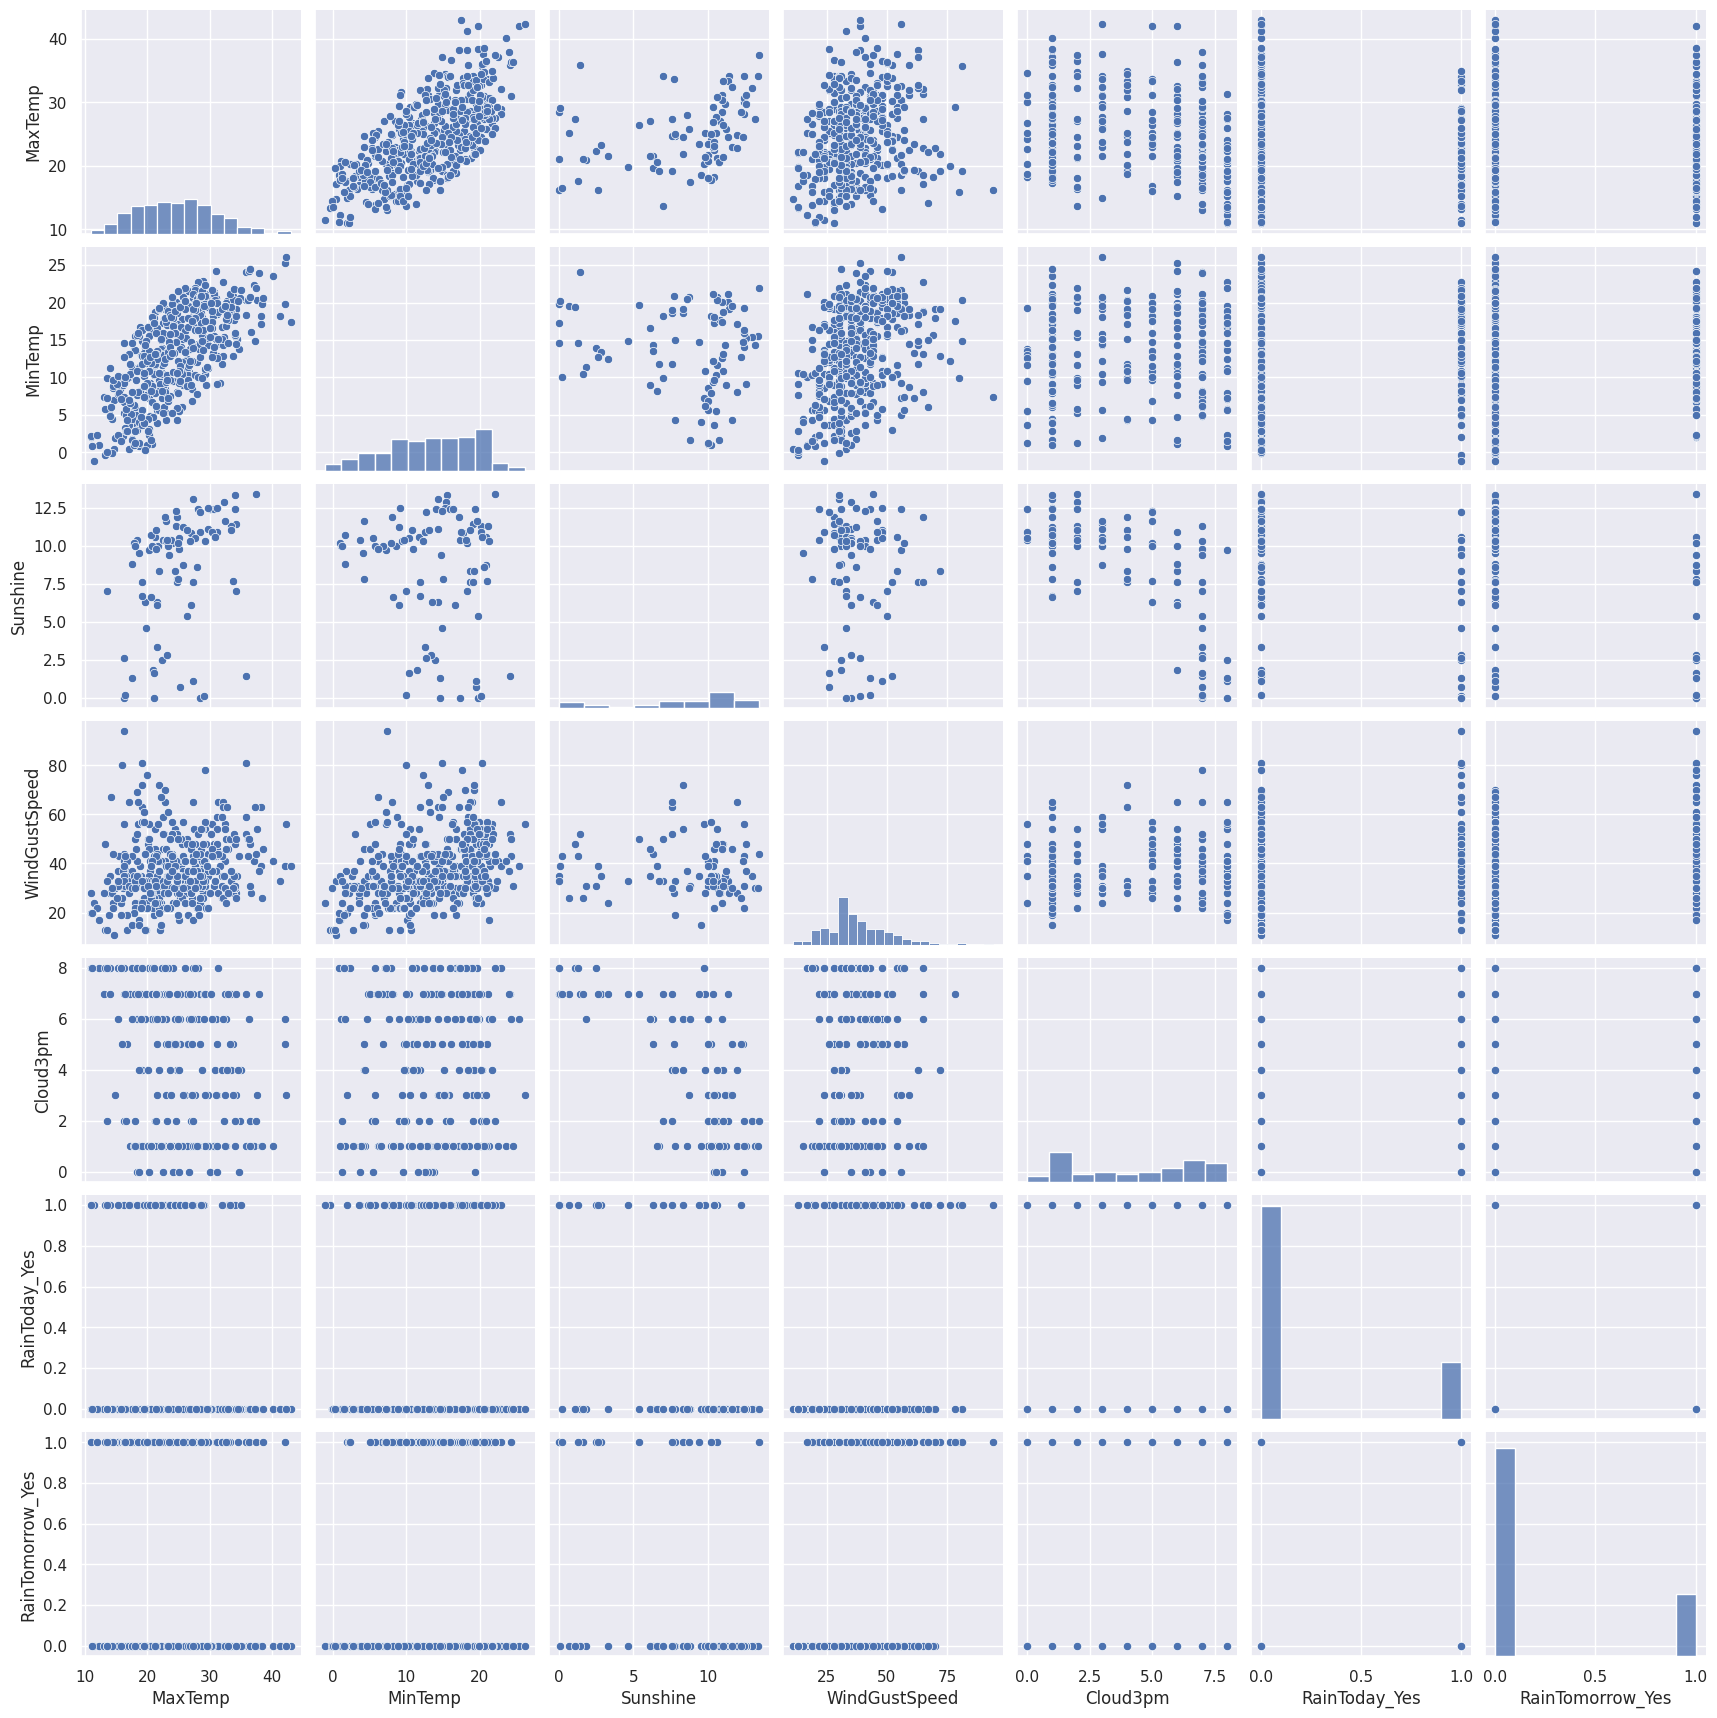

In [24]:
pair_plot_features = ['MaxTemp', 'MinTemp', 'Sunshine', 'WindGustSpeed', 'Cloud3pm', 'RainToday_Yes', 'RainTomorrow_Yes']
sns.pairplot(df_corr.sample(500, random_state=42)[pair_plot_features]);

Можно заметить, что если идет дождь, то температуры заметно меньше, чем когда он не идет
Также заметили положительную корреляцию между температурами и скоростью ветра



Отдельно рассмотрим влияние направления ветра на другие признаки. Закодируем направление ветра с помощью OneHotEncoding



In [14]:
df_encoded = pd.get_dummies(df, columns=["RainToday"], prefix="RainToday", dtype='int')
df_encoded = pd.get_dummies(df_encoded, columns=["RainTomorrow"], prefix="RainTomorrow", dtype='int')
df_encoded = df_encoded.drop(columns=['RainToday_No', 'RainTomorrow_No'])

df_encoded = pd.get_dummies(df_encoded, columns=["WindGustDir"], prefix="WindGustDir", dtype='int')
df_encoded.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


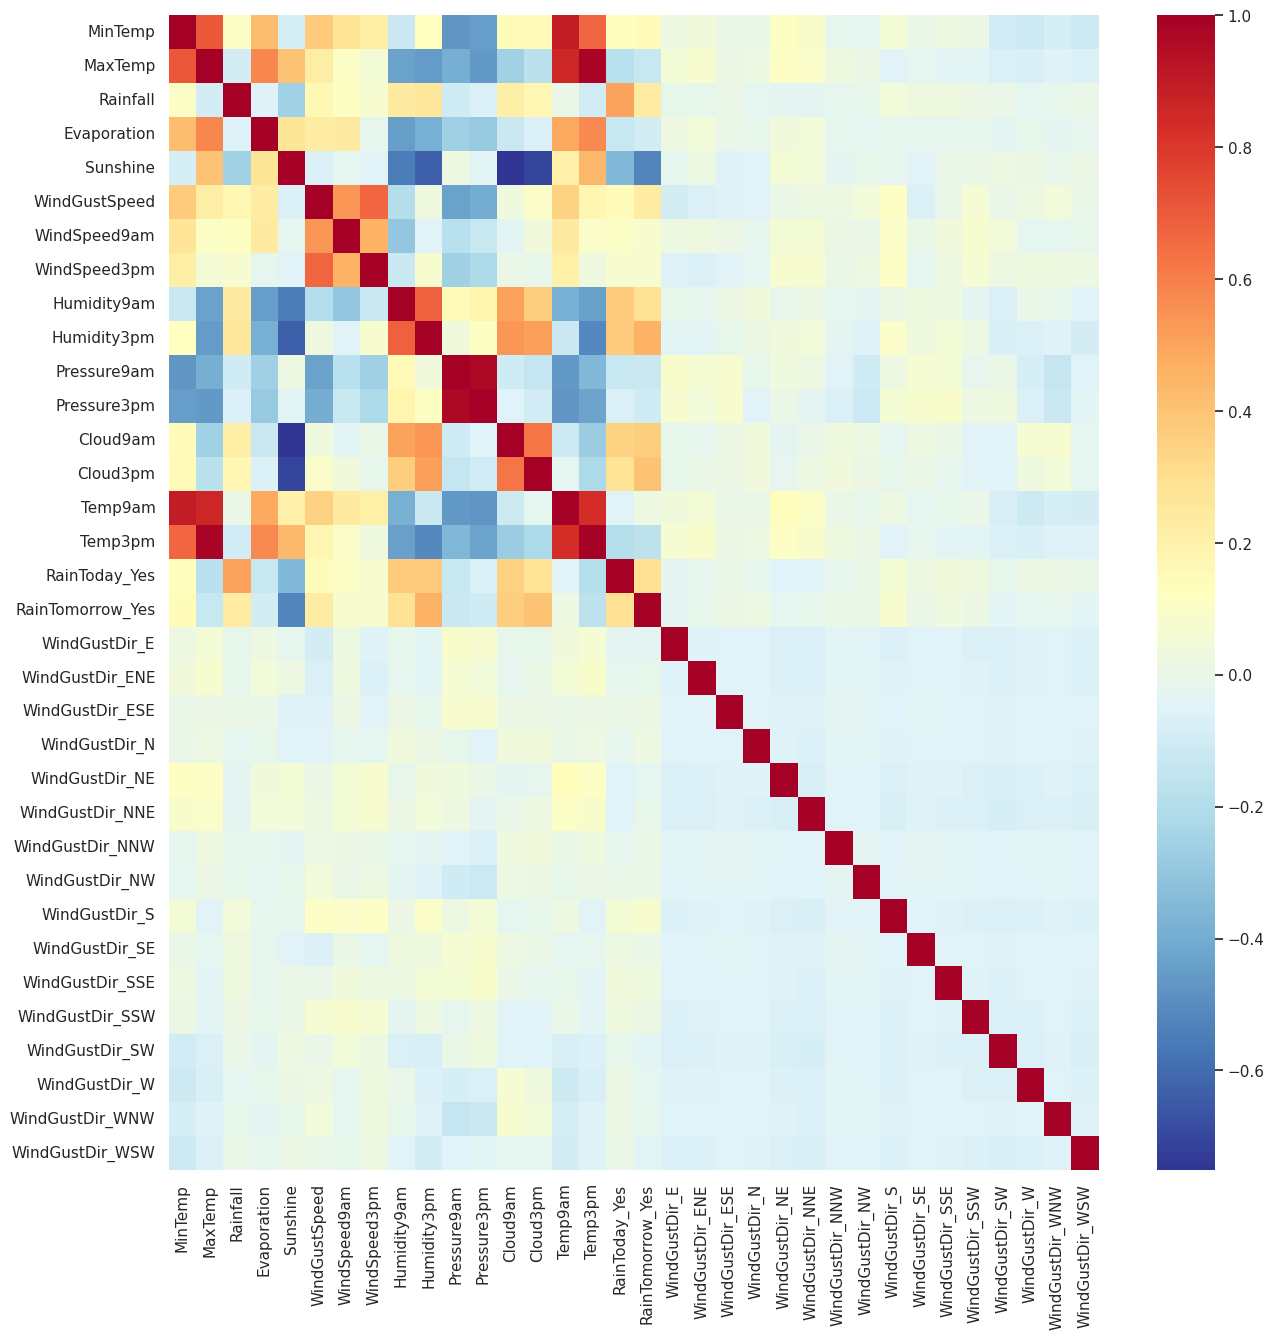

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df_encoded.select_dtypes(exclude='object').corr(), cmap="RdYlBu_r");

Направление имеет слабую линейную зависимость с другими признаками.
Можно заметить, что северный ветер приности теплые воздушные массы и температура повышается, западный ветер, наоборот, температуру понижает

Отдельно рассмотрим влияние месяц на другие признаки. Закодируем месяц ветра с помощью OneHotEncoding


In [31]:
df_encoded = df.copy()
df_encoded = pd.get_dummies(df, columns=["RainToday"], prefix="RainToday", dtype='int')
df_encoded = pd.get_dummies(df_encoded, columns=["RainTomorrow"], prefix="RainTomorrow", dtype='int')
df_encoded = df_encoded.drop(columns=['RainToday_No', 'RainTomorrow_No'])
df_encoded['Month'] = pd.to_datetime(df['Date']).dt.month
df_encoded = pd.get_dummies(df_encoded, columns=["Month"], prefix="Month", dtype='int')
df_encoded.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,0,1


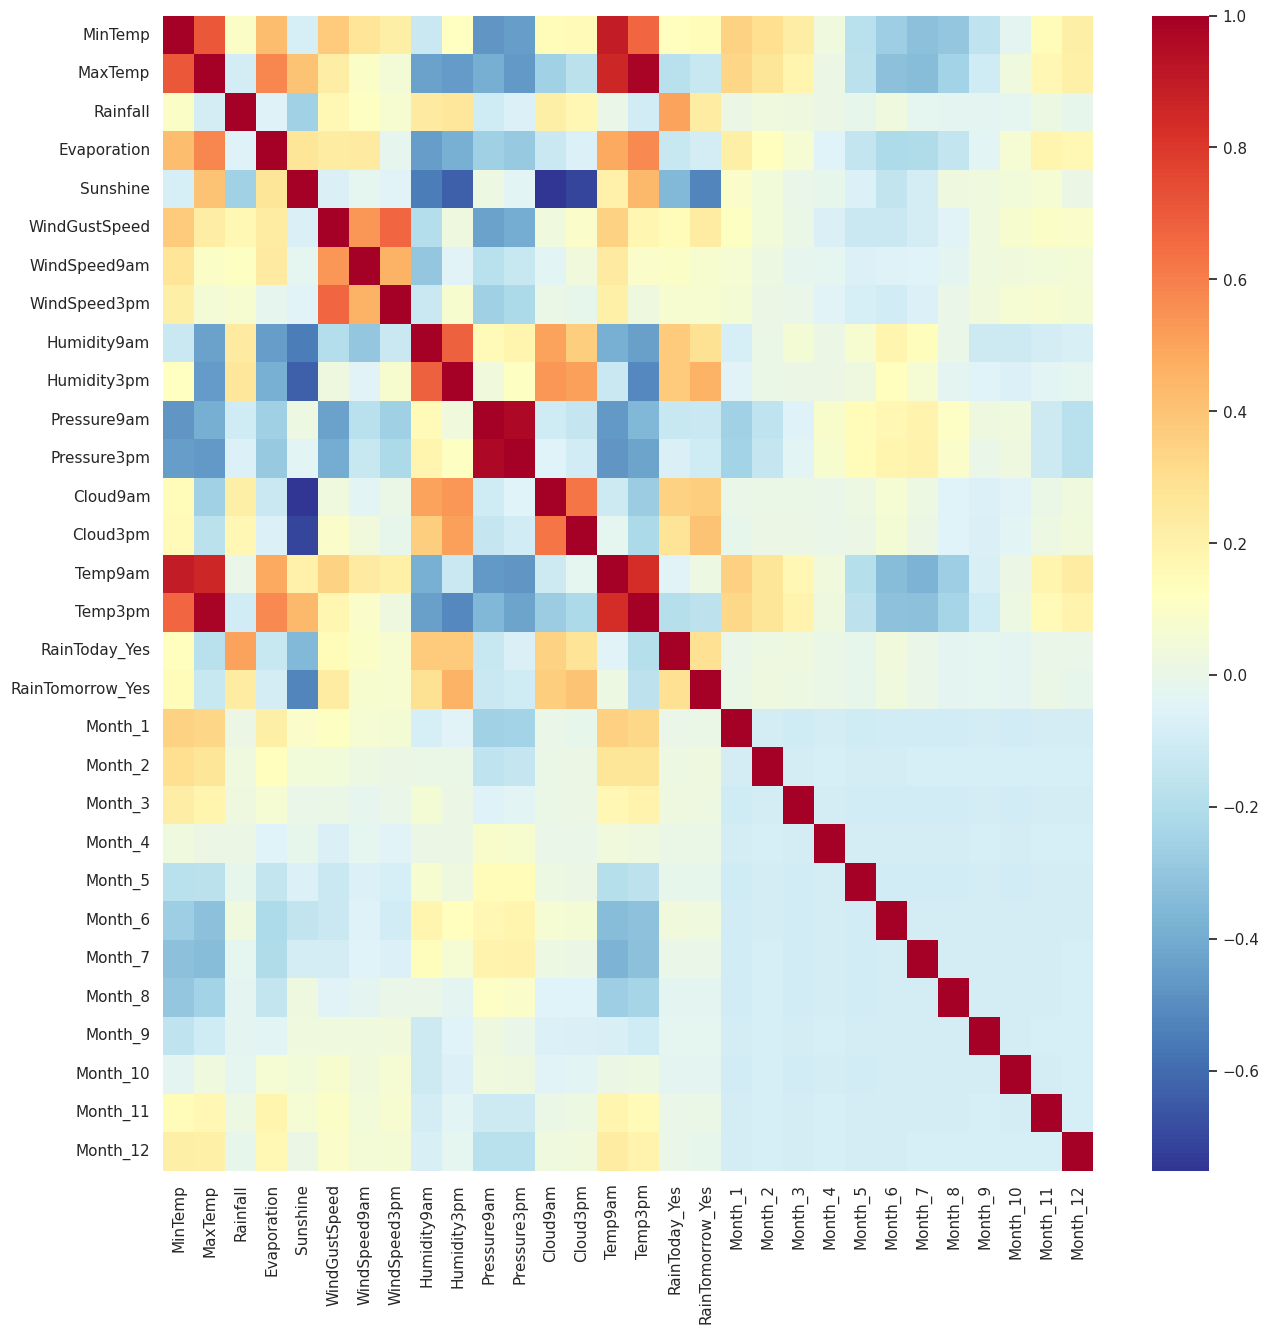

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(df_encoded.select_dtypes(exclude='object').corr(), cmap="RdYlBu_r");

Проследить зависимость между месцам и целевой переменной не удалось.
Австралия довольно большая и сезоны дождей в разных локациях отличаются

# ToDo

In [ ]:
# категориальные признаки +
# дождь по городам
# самый жаркий и самый холодный климат

# преобразовать данные +
# ящик с усами +
# матрица корреляция +
# рассмотреть графики зависимости +
# посмотреть кол-во аномалий и значения +

#  по дождю по выбору города и года
#  (темп. мин, тем. макс, уровень усадков) по месяцам, выбор города и выбор года
#  (темп. мин, тем. макс, уровень усадков) с усрд. значениями по месяцам, выбор города и выбор года
#  (темп. мин, тем. макс, уровень усадков) по месяцам, выбор города

# распределения по городам

# cравнение характериристик по городу и году (месяцу)

# New:
# Пересмотреть метрики
# Дополнить выводы
# Поработать с пропусками
# Статистика по локациям
# Карта
# Sweetviz